### Imports

In [1]:
import numpy as np, pandas as pd
import joblib, os
import matplotlib.pyplot as plt, seaborn as sns
sns.set_style("ticks")
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
%load_ext autoreload
%autoreload 2
from scripts import farseeing, classifiers, utils

### Uncertainty-Aware Fall Detection
The test set is not segmented. `X_test` is the full 20-minute signal and `y_test` contains the fall points for each signal.

#### With 5-fold Cross-validation and Multiphase

In [19]:
# Tabular models
kwargs = dict(
	window_size=7, cv=5,
	segment_test=False,
	multiphase=True,
	model_type=None,
    models_subset=None,
    ensemble=False
)
metric_df, aggr_df = classifiers.cross_validate(
	farseeing, **kwargs)



-- fold 1, testing on (8 subjects) --
Train set: X: (2638, 700), y: (2638,) ([ADLs, Falls]) [2524  114]
Test set: X: 34, y: 34
⏳ TRAINING RandomForest. ExtraTrees. Rocket. QUANT. TreeTS. 

ValueError: Expected 2D array, got 1D array instead:
array=[1. 0. 0. ... 0. 0. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [17]:
metric_df

,model,window_size,runtime,auc,precision,recall,specificity,f1-score,false alarm rate,miss rate,g,fold,Dataset
0,RandomForest,7,0.161877,0.954544,0.70,0.909091,0.999997,0.790960,1.181808,0.272725,0.001,0,FARSEEING
1,ExtraTrees,7,0.442257,0.863635,0.75,0.727273,0.999998,0.738462,0.727267,0.818175,0.001,0,FARSEEING
2,Rocket,7,7.821389,0.863635,0.63,0.727273,0.999996,0.675151,1.272717,0.818175,0.001,0,FARSEEING
3,QUANT,7,4.322266,0.939394,0.94,0.878788,0.999999,0.908364,0.181817,0.363633,0.001,0,FARSEEING
4,TreeTS,7,0.513688,0.939393,0.74,0.878788,0.999997,0.803444,0.909083,0.363633,0.001,0,FARSEEING
5,TSTree,7,12.266232,0.863635,0.65,0.727273,0.999997,0.686469,1.181808,0.818175,0.001,0,FARSEEING
6,MixedStack,7,11.702533,0.878786,0.69,0.757576,0.999997,0.722211,0.999992,0.727267,0.001,0,FARSEEING
7,RandomForest,7,0.163862,0.906976,0.85,0.813953,0.999999,0.831586,0.418601,0.558135,0.001,1,FARSEEING
8,ExtraTrees,7,0.544607,0.872093,0.89,0.744186,0.999999,0.810588,0.279067,0.767435,0.001,1,FARSEEING
9,Rocket,7,7.999661,0.918603,0.65,0.837209,0.999996,0.731822,1.325570,0.488368,0.001,1,FARSEEING


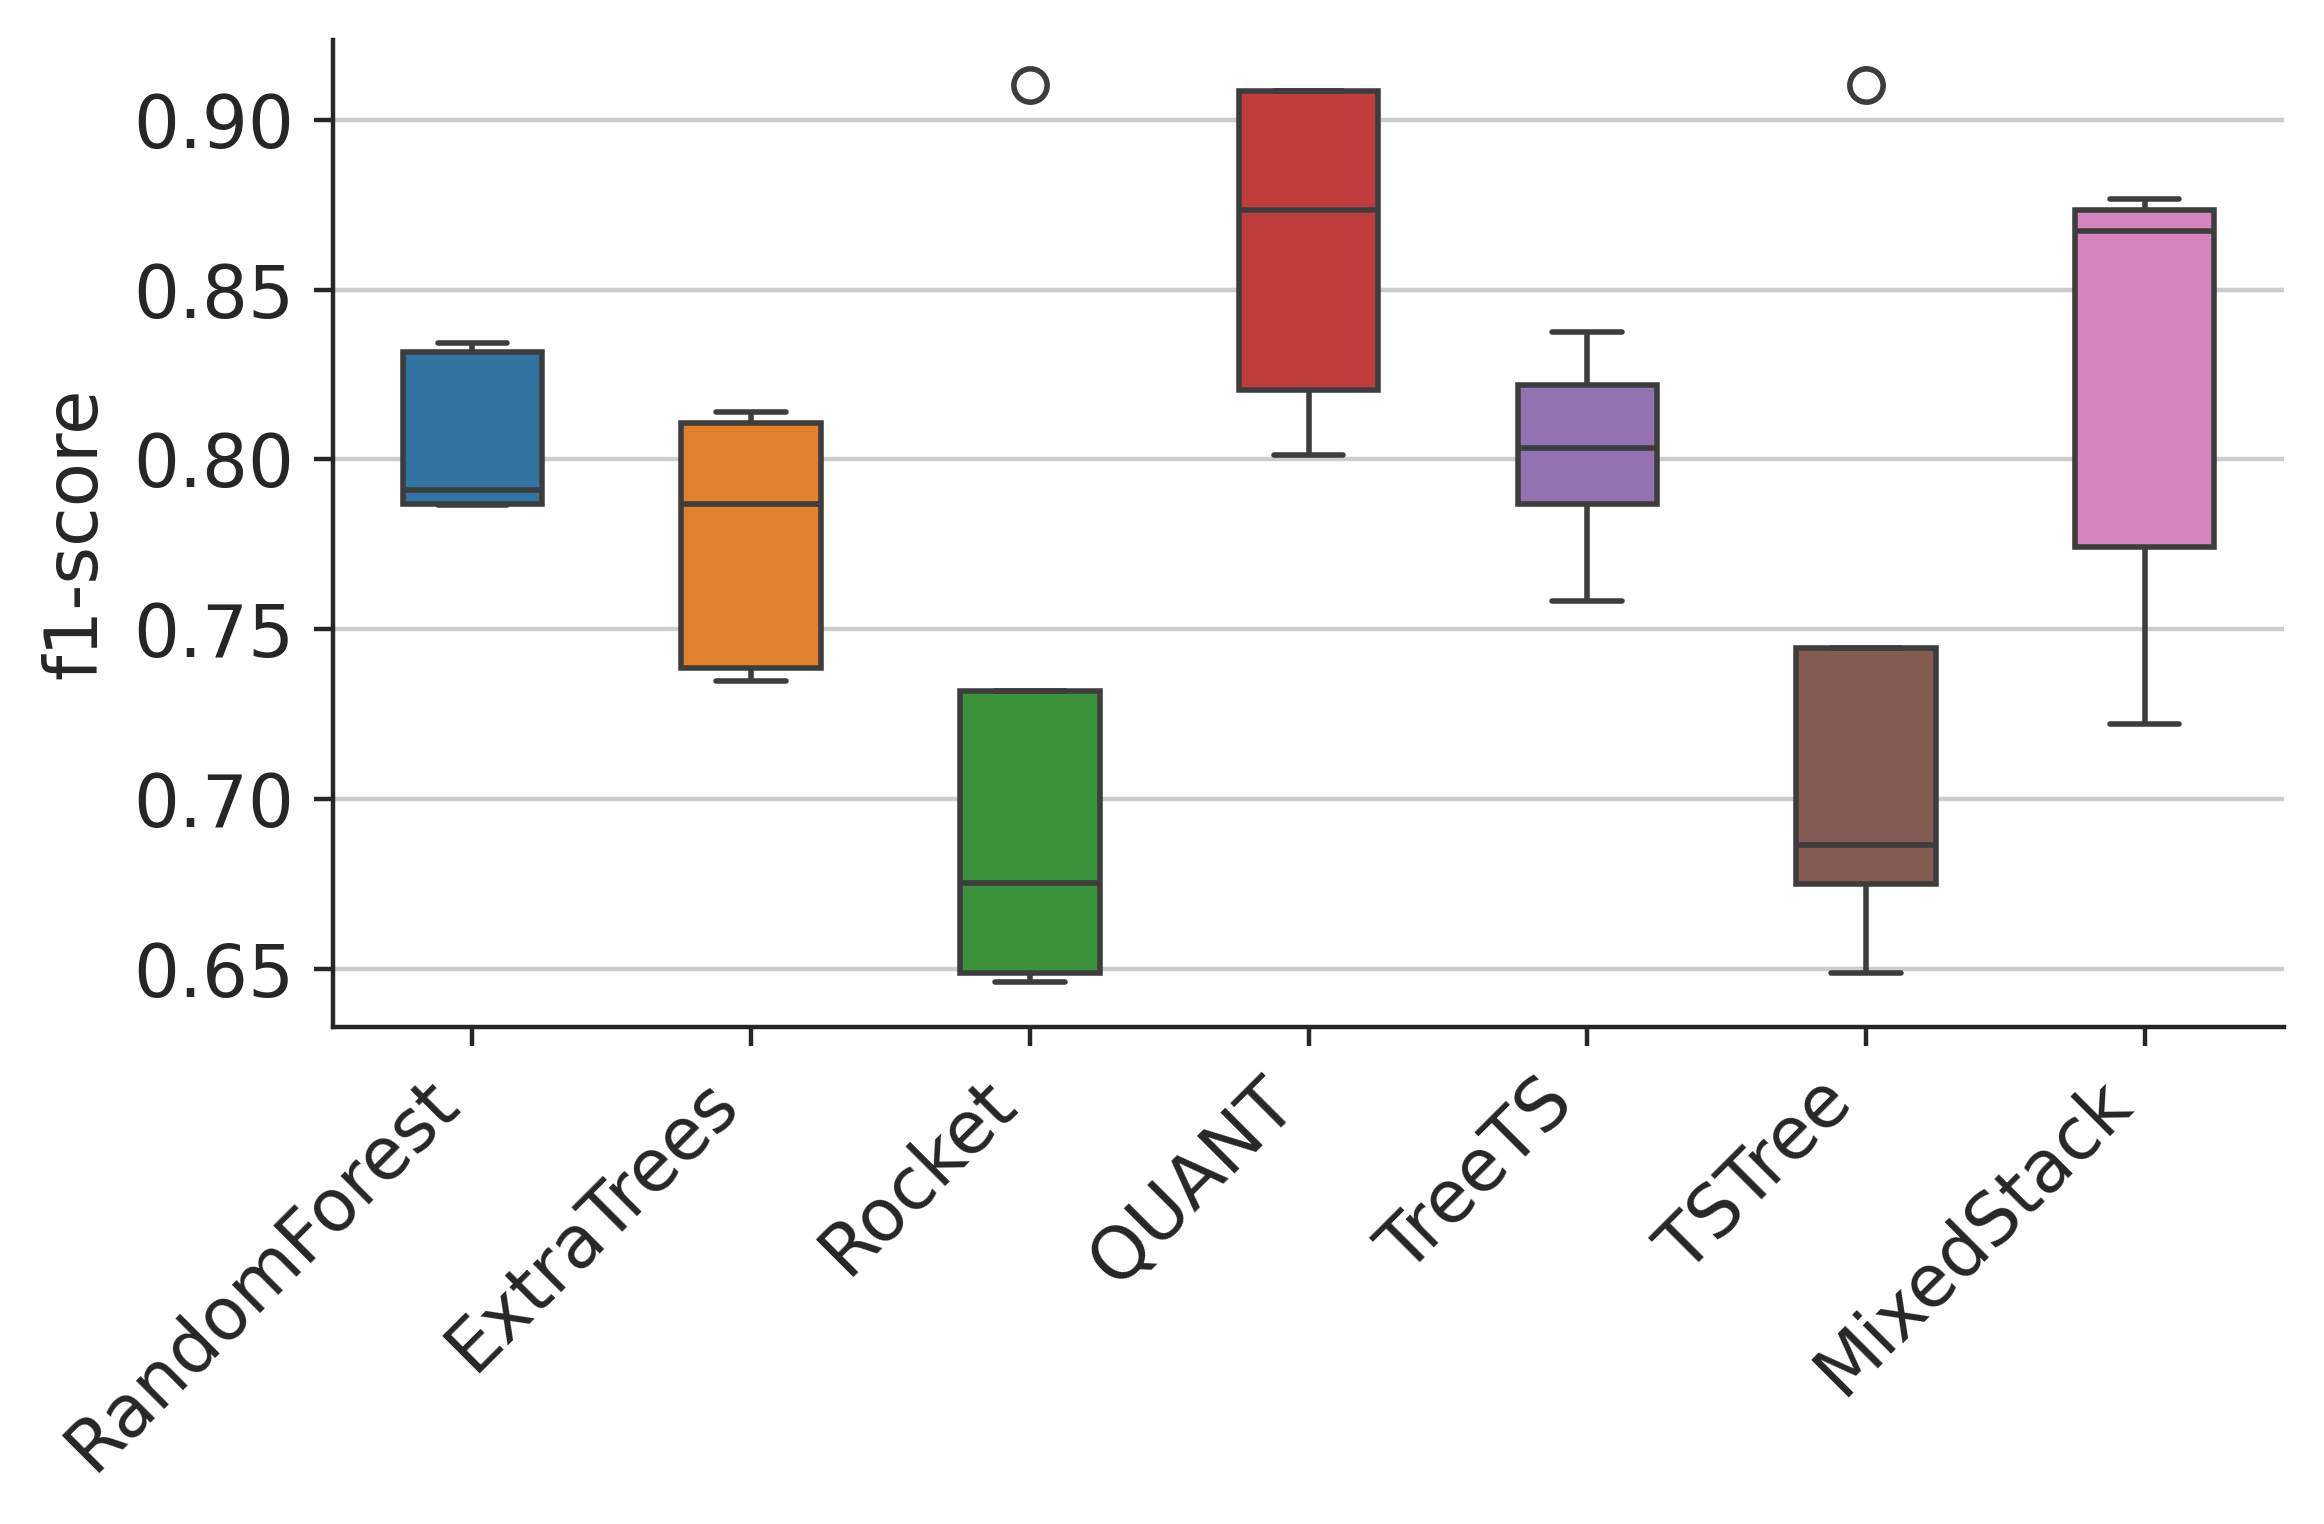

In [18]:
utils.summary_visualization([metric_df], name='all_models')

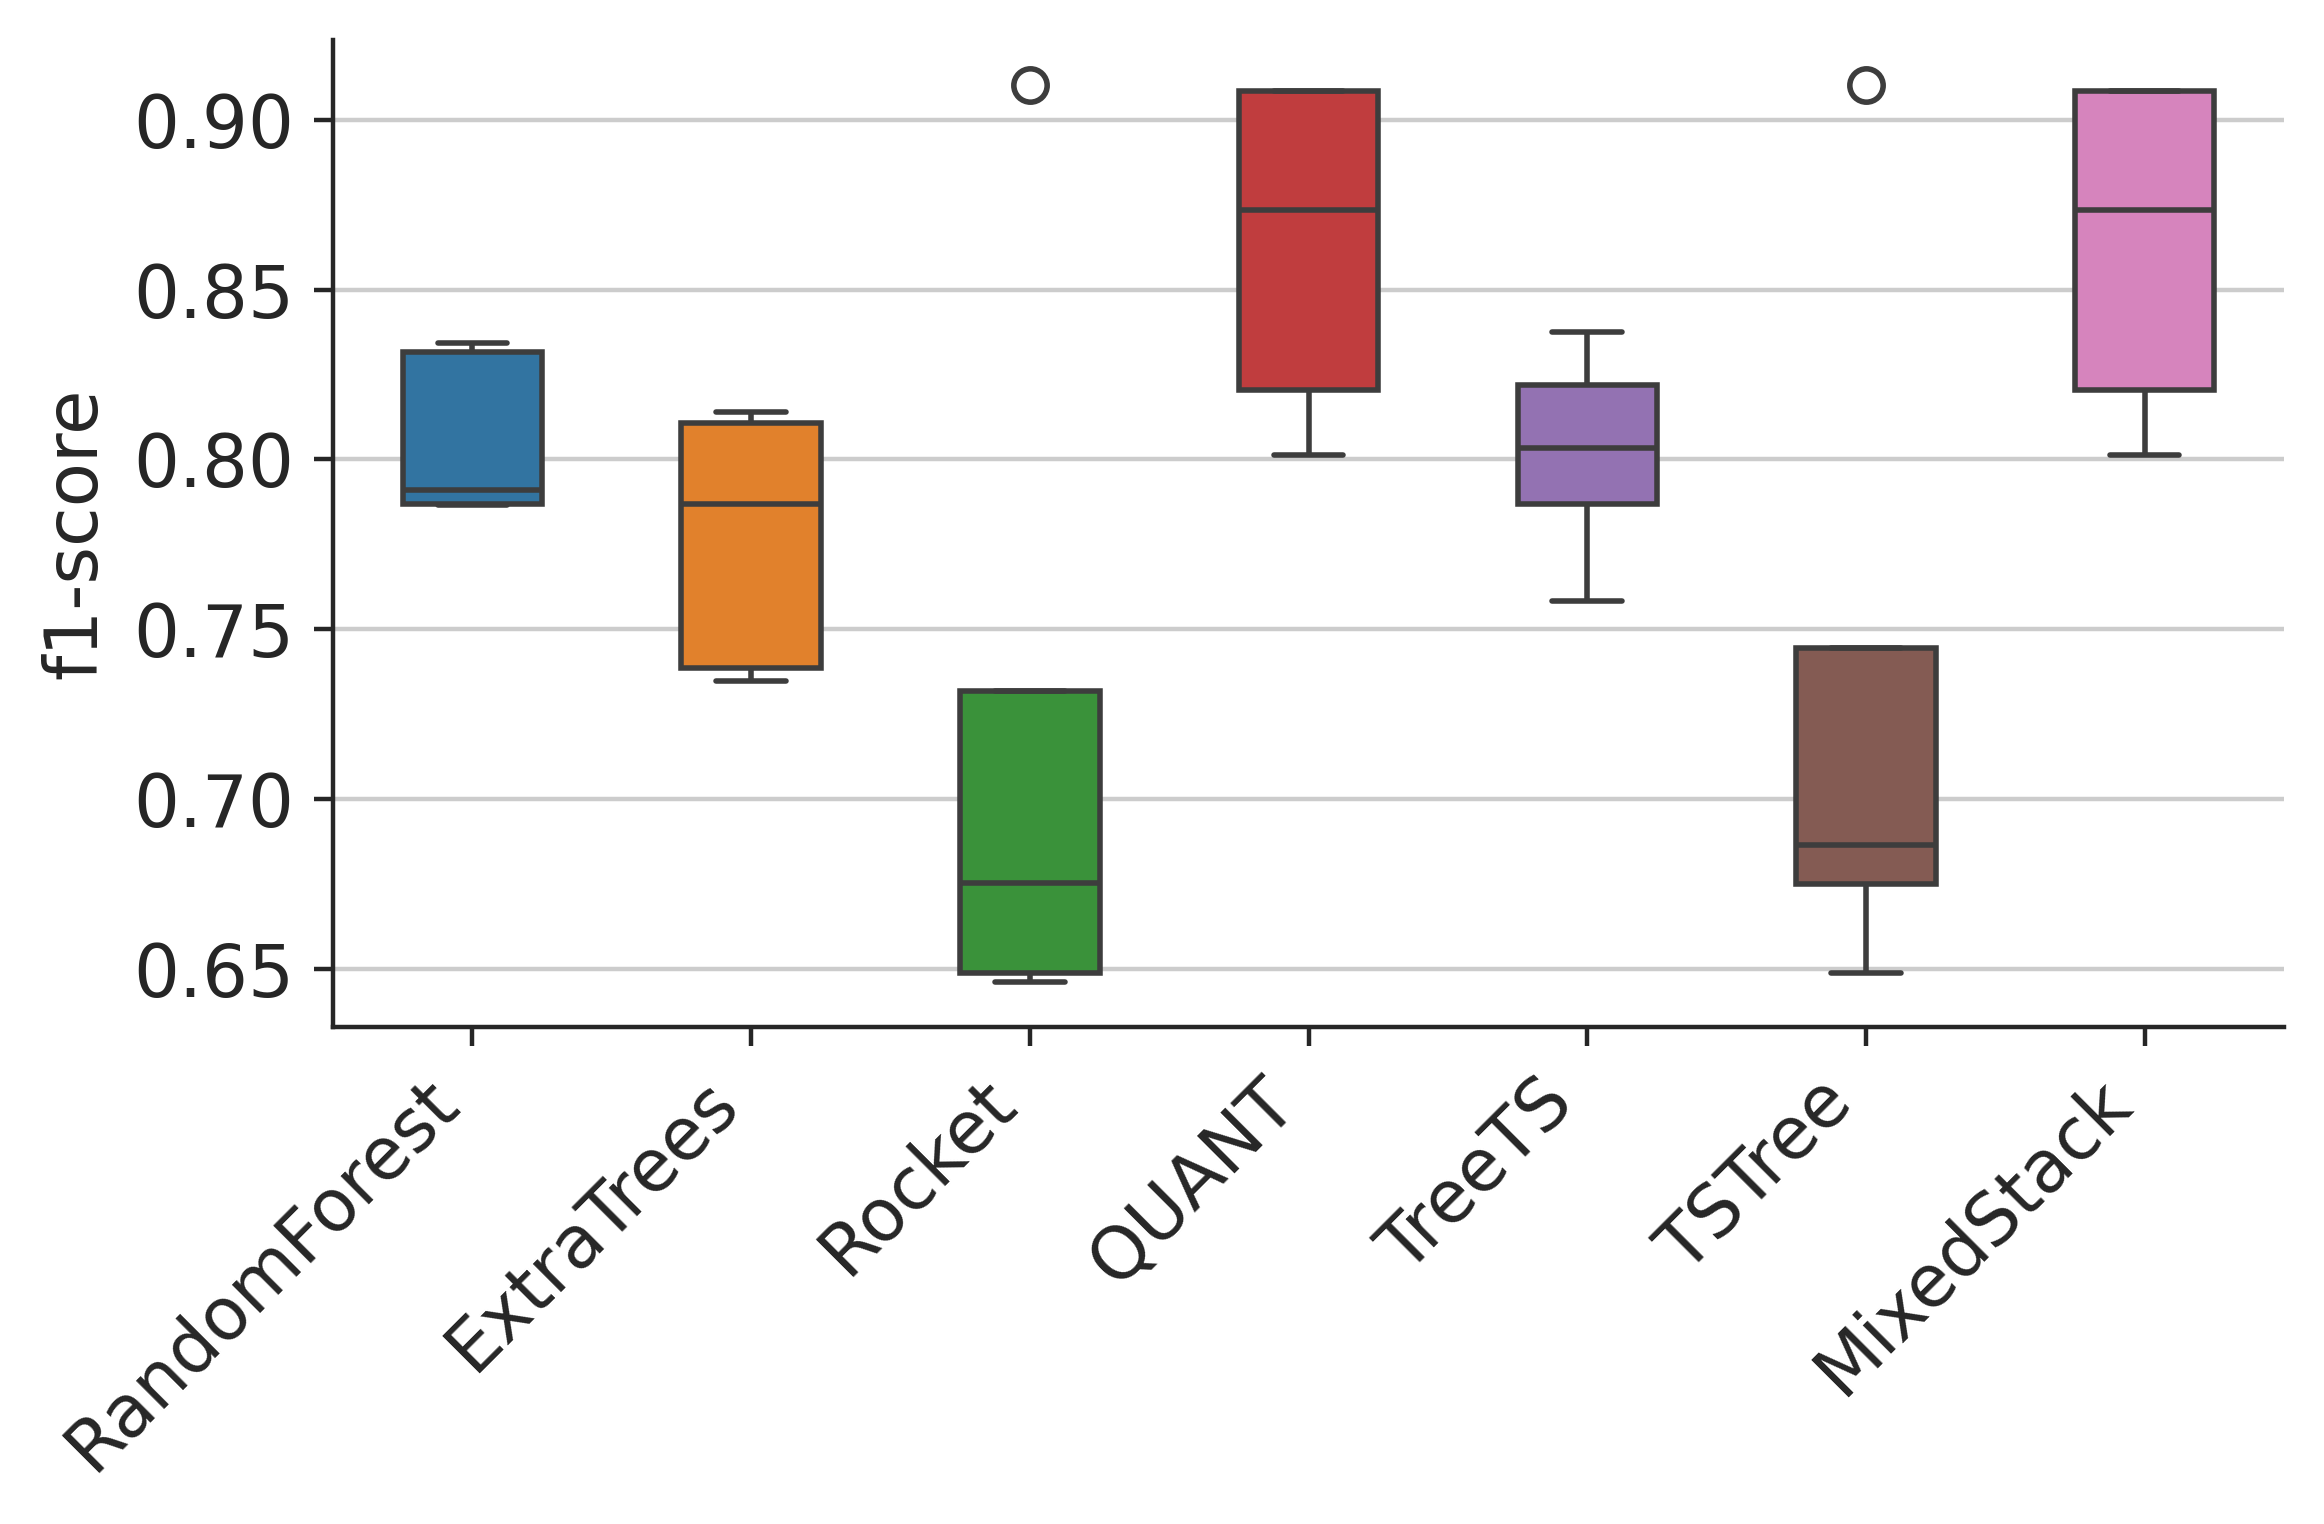

In [10]:
utils.summary_visualization([metric_df], name='all_models')

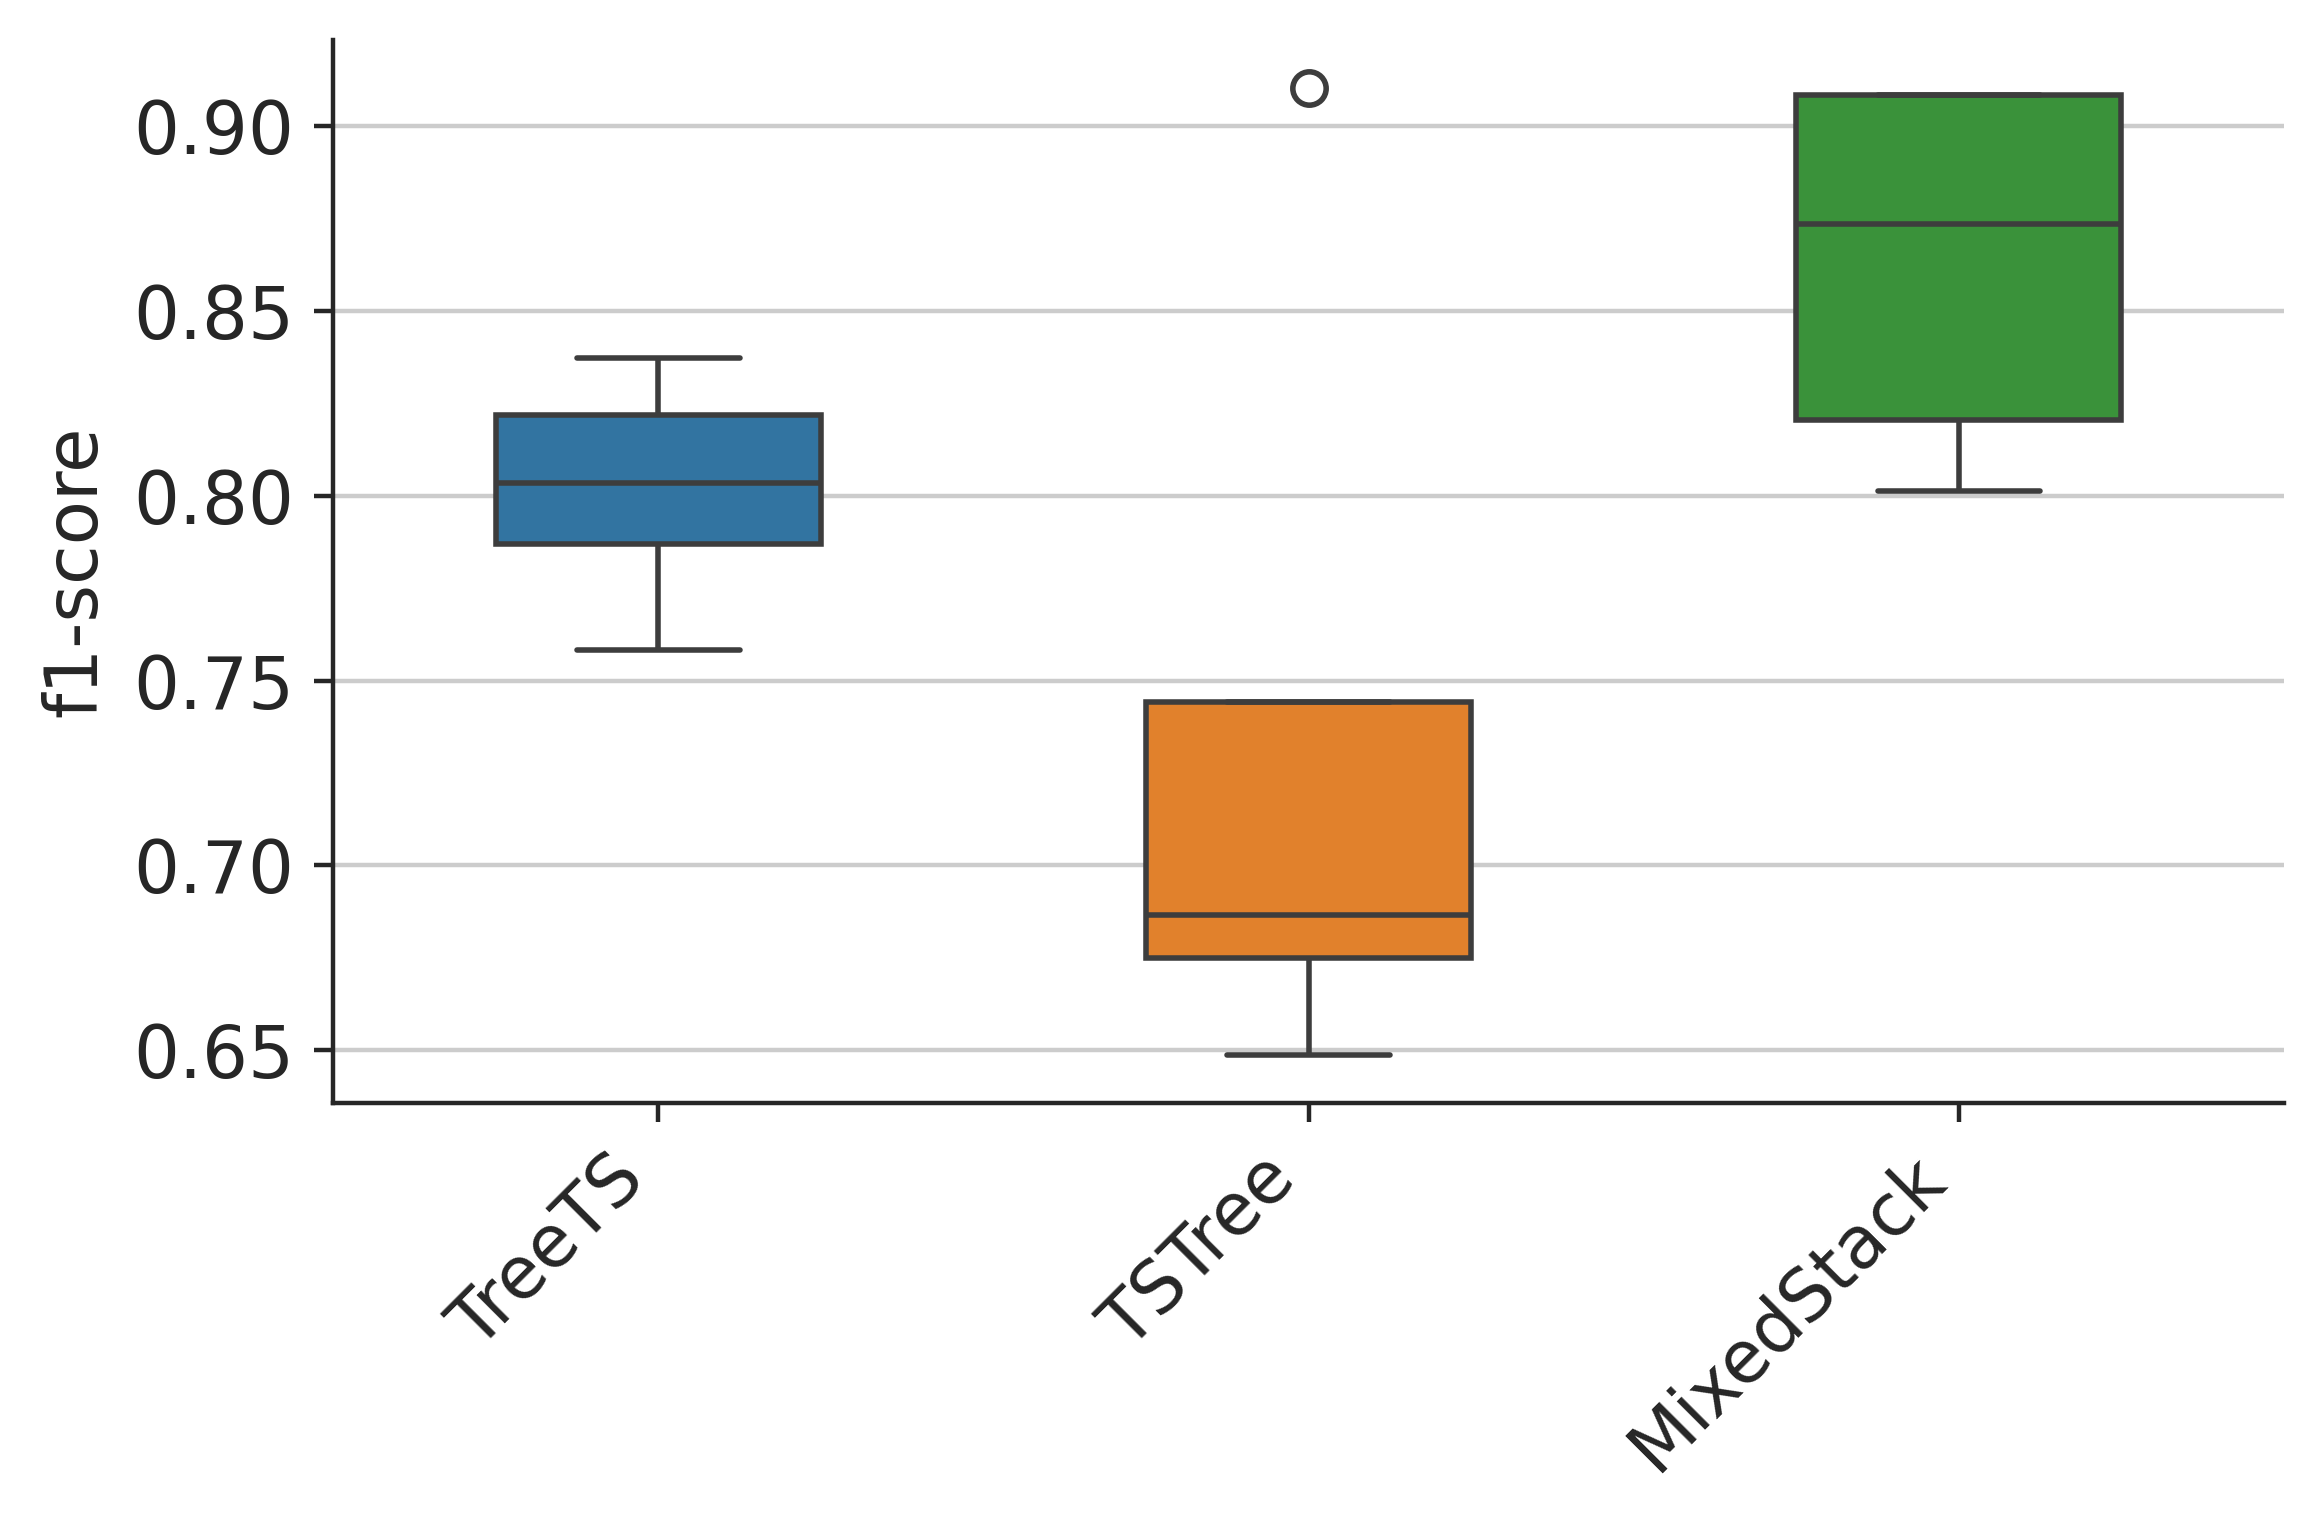

In [6]:
utils.summary_visualization([tab_metric_df], name='stacked')

In [3]:
tab_metric_df

,model,window_size,runtime,auc,precision,recall,specificity,f1-score,false alarm rate,miss rate,g,fold,Dataset,model_type
0,StackFallDetector,7,0.659071,0.863635,0.75,0.727273,0.999998,0.738462,0.727267,0.818175,0.001,0,FARSEEING,stack
1,StackFallDetector,7,0.628124,0.895349,0.92,0.790698,0.999999,0.850462,0.209301,0.627902,0.001,1,FARSEEING,stack
2,StackFallDetector,7,0.684726,0.882352,0.81,0.764706,0.999999,0.786702,0.534940,0.713254,0.001,2,FARSEEING,stack
3,StackFallDetector,7,0.639254,0.843750,0.92,0.687500,0.999999,0.786936,0.188659,0.943297,0.001,3,FARSEEING,stack
4,StackFallDetector,7,0.594164,0.896551,0.92,0.793103,0.999999,0.851852,0.207121,0.621362,0.001,4,FARSEEING,stack


In [8]:
tab_metric_df

,model,window_size,runtime,auc,precision,recall,specificity,f1-score,false alarm rate,miss rate,g,fold,Dataset,model_type
0,TreeTS,7,0.784891,0.939393,0.74,0.878788,0.999997,0.803444,0.909083,0.363633,0.001,0,FARSEEING,WorkerMain
1,TSTrees,7,14.054628,0.863635,0.65,0.727273,0.999997,0.686469,1.181808,0.818175,0.001,0,FARSEEING,WorkerMain
2,TreeTS,7,0.659609,0.895348,0.89,0.790698,0.999999,0.837415,0.279067,0.627902,0.001,1,FARSEEING,WorkerMain
3,TSTrees,7,14.516421,0.918603,0.67,0.837209,0.999997,0.744330,1.255803,0.488368,0.001,1,FARSEEING,WorkerMain
4,TreeTS,7,0.674685,0.911764,0.82,0.823529,0.999999,0.821761,0.534940,0.534940,0.001,2,FARSEEING,WorkerMain
5,TSTrees,7,14.015296,0.941176,0.94,0.882353,1.000000,0.910265,0.178313,0.356627,0.001,2,FARSEEING,WorkerMain
6,TreeTS,7,0.655356,0.843750,0.92,0.687500,0.999999,0.786936,0.188659,0.943297,0.001,3,FARSEEING,WorkerMain
7,TSTrees,7,13.764676,0.906247,0.54,0.812500,0.999994,0.648799,2.075253,0.565978,0.001,3,FARSEEING,WorkerMain
8,TreeTS,7,0.477139,0.827586,0.90,0.655172,0.999999,0.758315,0.207121,1.035604,0.001,4,FARSEEING,WorkerMain
9,TSTrees,7,13.884433,0.913791,0.57,0.827586,0.999995,0.675056,1.864087,0.517802,0.001,4,FARSEEING,WorkerMain


In [6]:
tab_metric_df

,model,window_size,runtime,auc,precision,recall,specificity,f1-score,false alarm rate,miss rate,g,fold,Dataset,model_type
0,WorkerMain,7,1.078922,0.939393,0.74,0.878788,0.999997,0.803444,0.909083,0.363633,0.001,0,FARSEEING,WorkerMain
1,Ensemble,7,1.078922,0.939393,0.74,0.878788,0.999997,0.803444,0.909083,0.363633,0.001,0,FARSEEING,WorkerMain
2,WorkerMain,7,1.038469,0.895348,0.89,0.790698,0.999999,0.837415,0.279067,0.627902,0.001,1,FARSEEING,WorkerMain
3,Ensemble,7,1.038469,0.895348,0.89,0.790698,0.999999,0.837415,0.279067,0.627902,0.001,1,FARSEEING,WorkerMain
4,WorkerMain,7,1.301143,0.911764,0.82,0.823529,0.999999,0.821761,0.534940,0.534940,0.001,2,FARSEEING,WorkerMain
5,Ensemble,7,1.301143,0.900000,0.92,0.800000,0.999999,0.855814,0.178313,0.534940,0.001,2,FARSEEING,WorkerMain
6,WorkerMain,7,1.075634,0.843750,0.92,0.687500,0.999999,0.786936,0.188659,0.943297,0.001,3,FARSEEING,WorkerMain
7,Ensemble,7,1.075634,0.866666,0.92,0.733333,0.999999,0.816129,0.188659,0.754637,0.001,3,FARSEEING,WorkerMain
8,WorkerMain,7,2.887728,0.827586,0.90,0.655172,0.999999,0.758315,0.207121,1.035604,0.001,4,FARSEEING,WorkerMain
9,Ensemble,7,2.887728,0.821428,0.90,0.642857,0.999999,0.750000,0.207121,1.035604,0.001,4,FARSEEING,WorkerMain


In [5]:
tab_metric_df

,model,window_size,runtime,auc,precision,recall,specificity,f1-score,false alarm rate,miss rate,g,fold,Dataset,model_type
0,LogisticCV,7,0.165519,0.893938,0.76,0.787879,0.999998,0.773688,0.727267,0.636358,0.001,0,FARSEEING,tabular
1,RandomForest,7,0.201400,0.939392,0.69,0.878788,0.999997,0.773035,1.181808,0.363633,0.001,0,FARSEEING,tabular
2,ExtraTrees,7,0.487653,0.878787,0.76,0.757576,0.999998,0.758786,0.727267,0.727267,0.001,0,FARSEEING,tabular
3,Ensemble,7,0.487653,0.909090,0.82,0.818182,0.999998,0.819090,0.545450,0.545450,0.001,0,FARSEEING,tabular
4,LogisticCV,7,0.171896,0.813953,0.90,0.627907,0.999999,0.739726,0.209301,1.116270,0.001,1,FARSEEING,tabular
5,RandomForest,7,0.206207,0.895348,0.83,0.790698,0.999999,0.809872,0.488368,0.627902,0.001,1,FARSEEING,tabular
6,ExtraTrees,7,0.564829,0.860465,0.89,0.720930,0.999999,0.796593,0.279067,0.837202,0.001,1,FARSEEING,tabular
7,Ensemble,7,0.564829,0.872093,0.91,0.744186,0.999999,0.818783,0.209301,0.767435,0.001,1,FARSEEING,tabular
8,LogisticCV,7,0.177054,0.852941,0.92,0.705882,1.000000,0.798842,0.178313,0.891567,0.001,2,FARSEEING,tabular
9,RandomForest,7,0.209691,0.911764,0.82,0.823529,0.999999,0.821761,0.534940,0.534940,0.001,2,FARSEEING,tabular


In [6]:
# ts models
kwargs = dict(
	window_size=7, cv=5,
	segment_test=False,
	multiphase=True,
	model_type='ts'
)
ts_metric_df, ts_aggr_df = classifiers.cross_validate(
	farseeing, **kwargs)
ts_metric_df['model_type'] = 'ts'
ts_aggr_df['model_type'] = 'ts'



-- fold 1, testing on (8 subjects) --
Train set: X: (2638, 700), y: (2638,) ([ADLs, Falls]) [2524  114]
Test set: X: 34, y: 34
⏳ TRAINING Rocket. Catch22. QUANT. ✅
🔍 TESTING Rocket. Catch22. QUANT. Ensemble. ✅


-- fold 2, testing on (8 subjects) --
Train set: X: (1659, 700), y: (1659,) ([ADLs, Falls]) [1587   72]
Test set: X: 46, y: 46
⏳ TRAINING Rocket. Catch22. QUANT. ✅
🔍 TESTING Rocket. Catch22. QUANT. Ensemble. ✅


-- fold 3, testing on (8 subjects) --
Train set: X: (1352, 700), y: (1352,) ([ADLs, Falls]) [1291   61]
Test set: X: 17, y: 17
⏳ TRAINING Rocket. Catch22. QUANT. ✅
🔍 TESTING Rocket. Catch22. QUANT. Ensemble. ✅


-- fold 4, testing on (8 subjects) --
Train set: X: (1136, 700), y: (1136,) ([ADLs, Falls]) [1091   45]
Test set: X: 18, y: 18
⏳ TRAINING Rocket. Catch22. QUANT. ✅
🔍 TESTING Rocket. Catch22. QUANT. Ensemble. ✅


-- fold 5, testing on (8 subjects) --
Train set: X: (815, 700), y: (815,) ([ADLs, Falls]) [790  25]
Test set: X: 29, y: 29
⏳ TRAINING Rocket. Catch22.

In [7]:
ts_metric_df

,model,window_size,runtime,auc,precision,recall,specificity,f1-score,false alarm rate,miss rate,g,fold,Dataset,model_type
0,Rocket,7,2.393818,0.803029,0.74,0.606061,0.999998,0.666367,0.636358,1.181808,0.001,0,FARSEEING,ts
1,Catch22,7,3.312528,0.939392,0.69,0.878788,0.999997,0.773035,1.181808,0.363633,0.001,0,FARSEEING,ts
2,QUANT,7,1.141026,0.954545,0.86,0.909091,0.999999,0.883864,0.454542,0.272725,0.001,0,FARSEEING,ts
3,Ensemble,7,1.141026,0.924242,0.85,0.848485,0.999999,0.849242,0.454542,0.454542,0.001,0,FARSEEING,ts
4,Rocket,7,2.606436,0.767441,0.62,0.534884,0.999997,0.574305,0.976736,1.395337,0.001,1,FARSEEING,ts
5,Catch22,7,3.087576,0.941859,0.76,0.883721,0.999998,0.817204,0.837202,0.348834,0.001,1,FARSEEING,ts
6,QUANT,7,4.279570,0.953488,0.85,0.906977,0.999999,0.877565,0.488368,0.279067,0.001,1,FARSEEING,ts
7,Ensemble,7,4.279570,0.918604,0.86,0.837209,0.999999,0.848452,0.418601,0.488368,0.001,1,FARSEEING,ts
8,Rocket,7,2.557856,0.823529,0.92,0.647059,1.000000,0.759760,0.178313,1.069881,0.001,2,FARSEEING,ts
9,Catch22,7,4.247423,0.852941,0.92,0.705882,1.000000,0.798842,0.178313,0.891567,0.001,2,FARSEEING,ts


In [8]:
# save all dfs
all_metric_df = pd.concat([tab_metric_df, ts_metric_df], ignore_index=True)
all_aggr_df = pd.concat([tab_aggr_df, ts_aggr_df], ignore_index=True)
all_metric_df.to_csv('results/farseeing_all_metric_df_7_seclectfrom.csv', index=False)
all_aggr_df.to_csv('results/farseeing_all_aggr_df_7_seclectfrom.csv', index=False)

In [9]:
load_path = 'results/farseeing_all_metric_df_7_seclectfrom.csv'
all_metric_df = pd.read_csv(load_path)
tab_metric_df = all_metric_df[all_metric_df['model_type'] == 'tabular']
ts_metric_df = all_metric_df[all_metric_df['model_type'] == 'ts']

In [ ]:
tab_metric_df.replace({'model': {'Ensemble': 'Tabular Ensemble'}}, inplace=True)
ts_metric_df.replace({'model': {'Ensemble': 'TS Ensemble'}}, inplace=True)
all_metric_df = pd.concat([tab_metric_df, ts_metric_df], ignore_index=True)

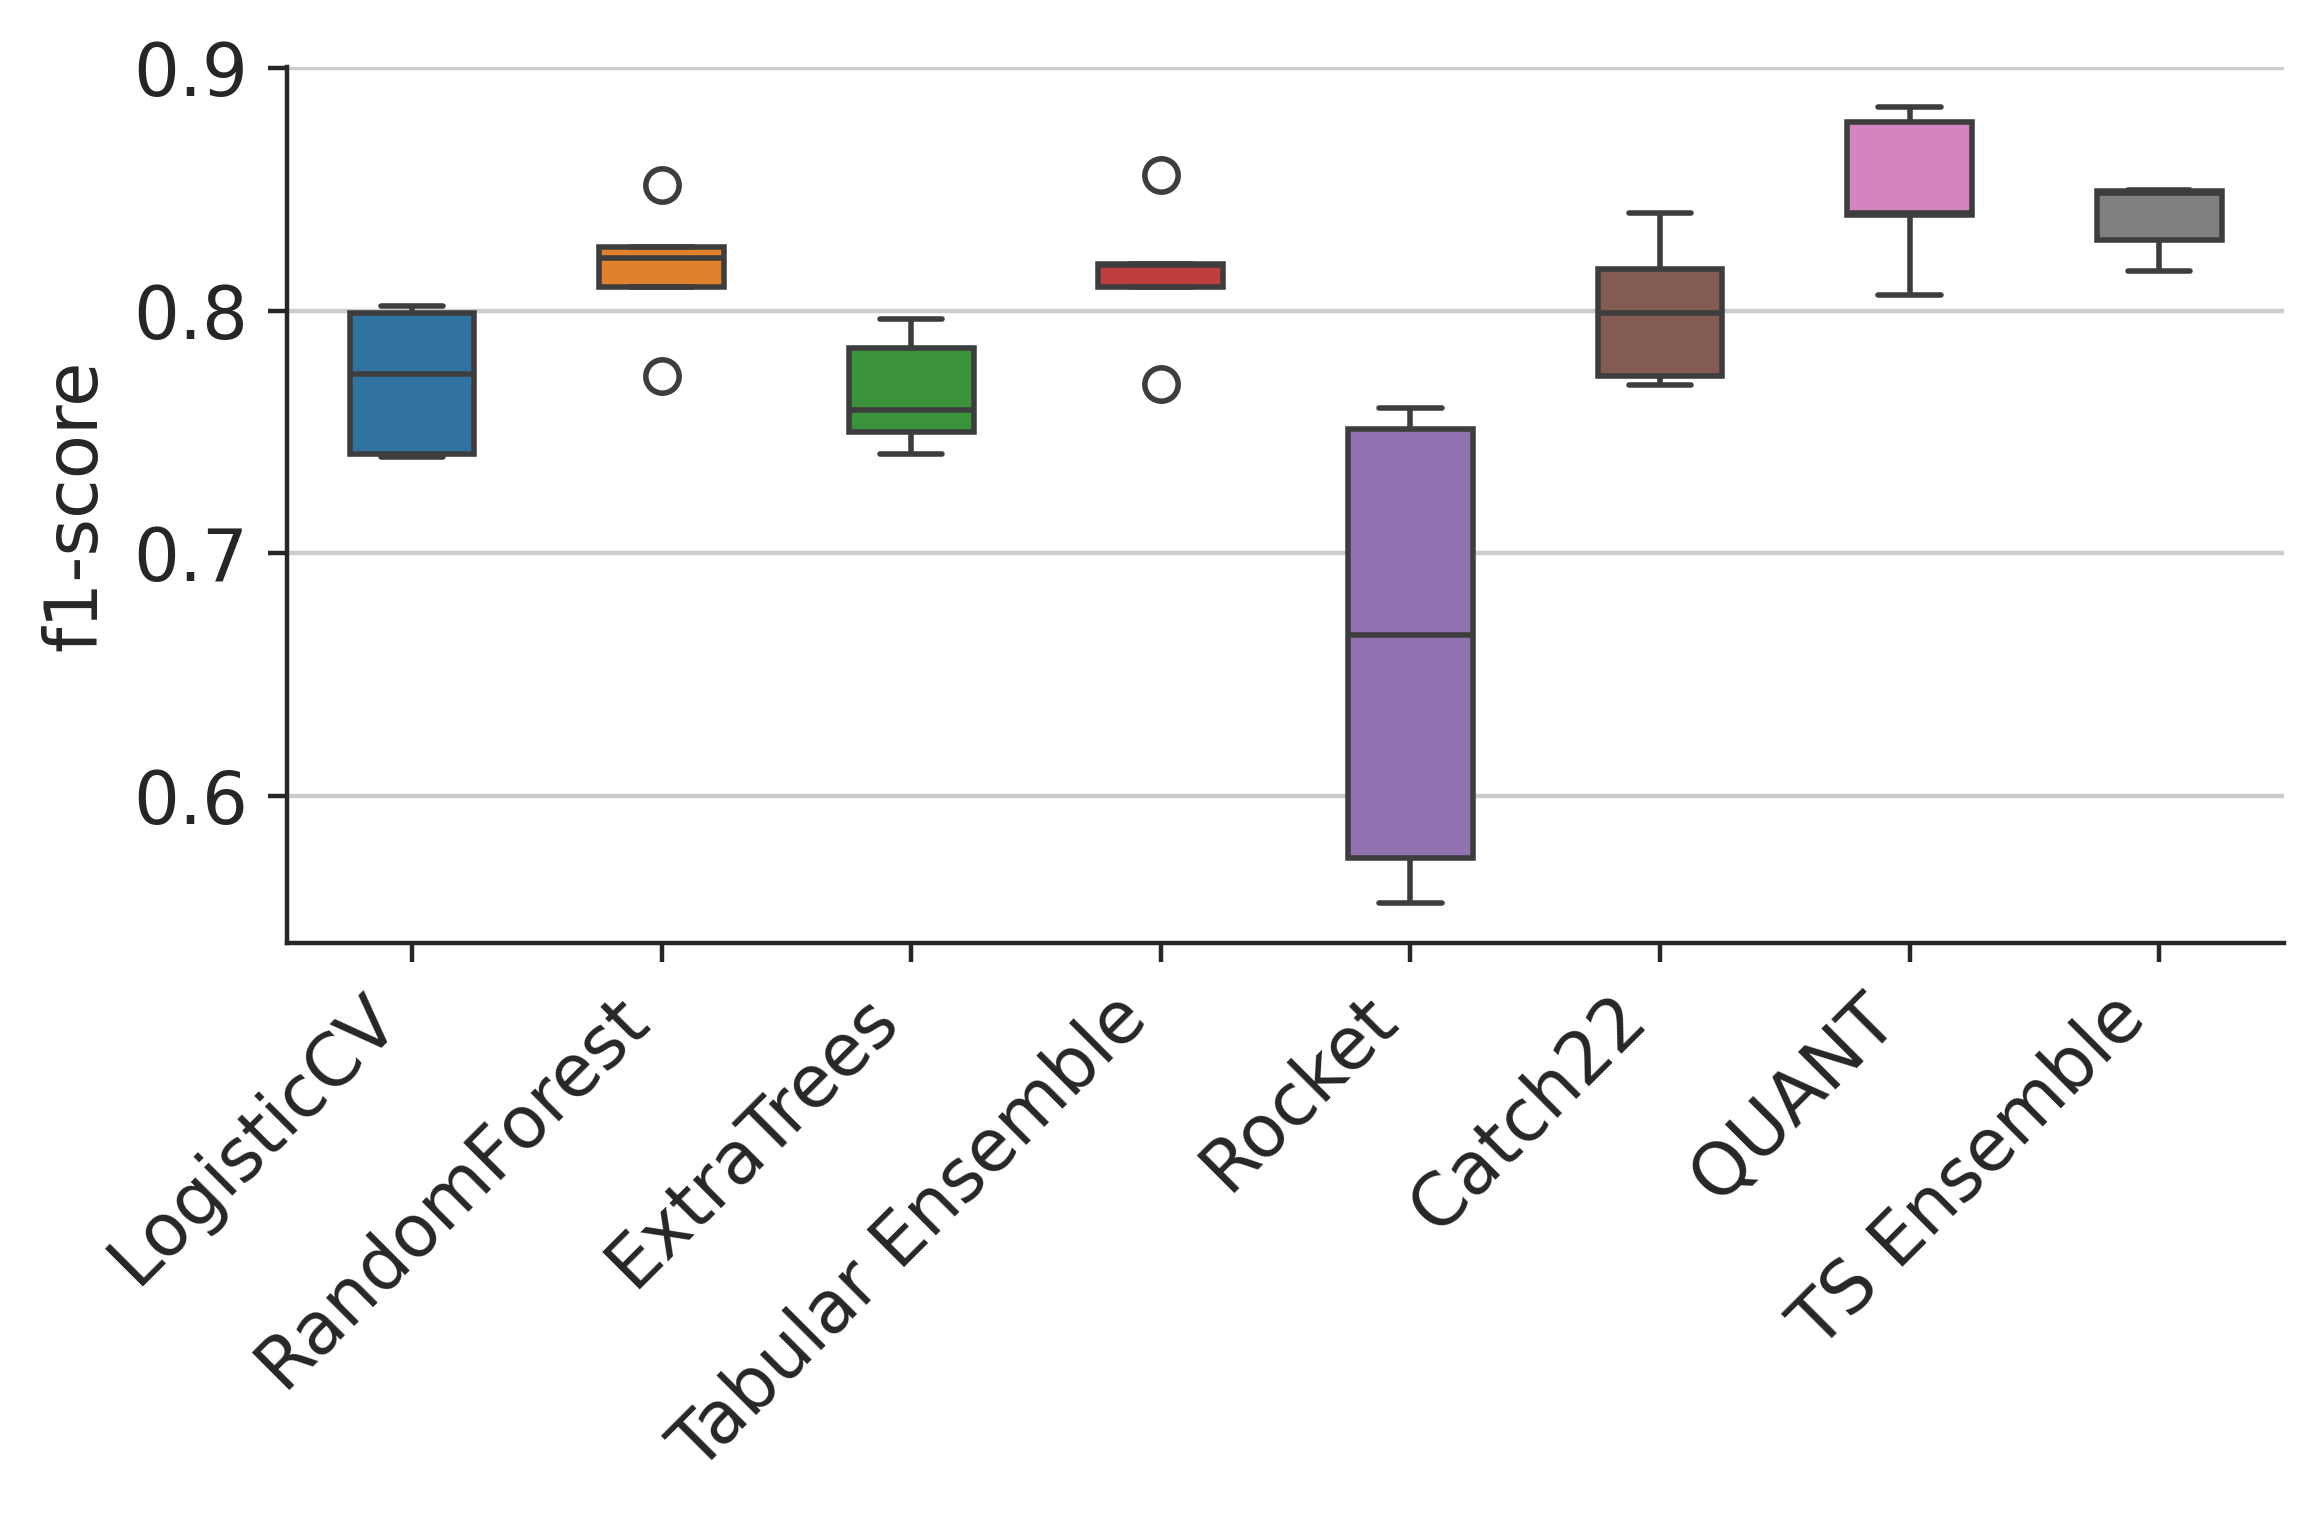

In [11]:
utils.summary_visualization([all_metric_df], name='all_models')

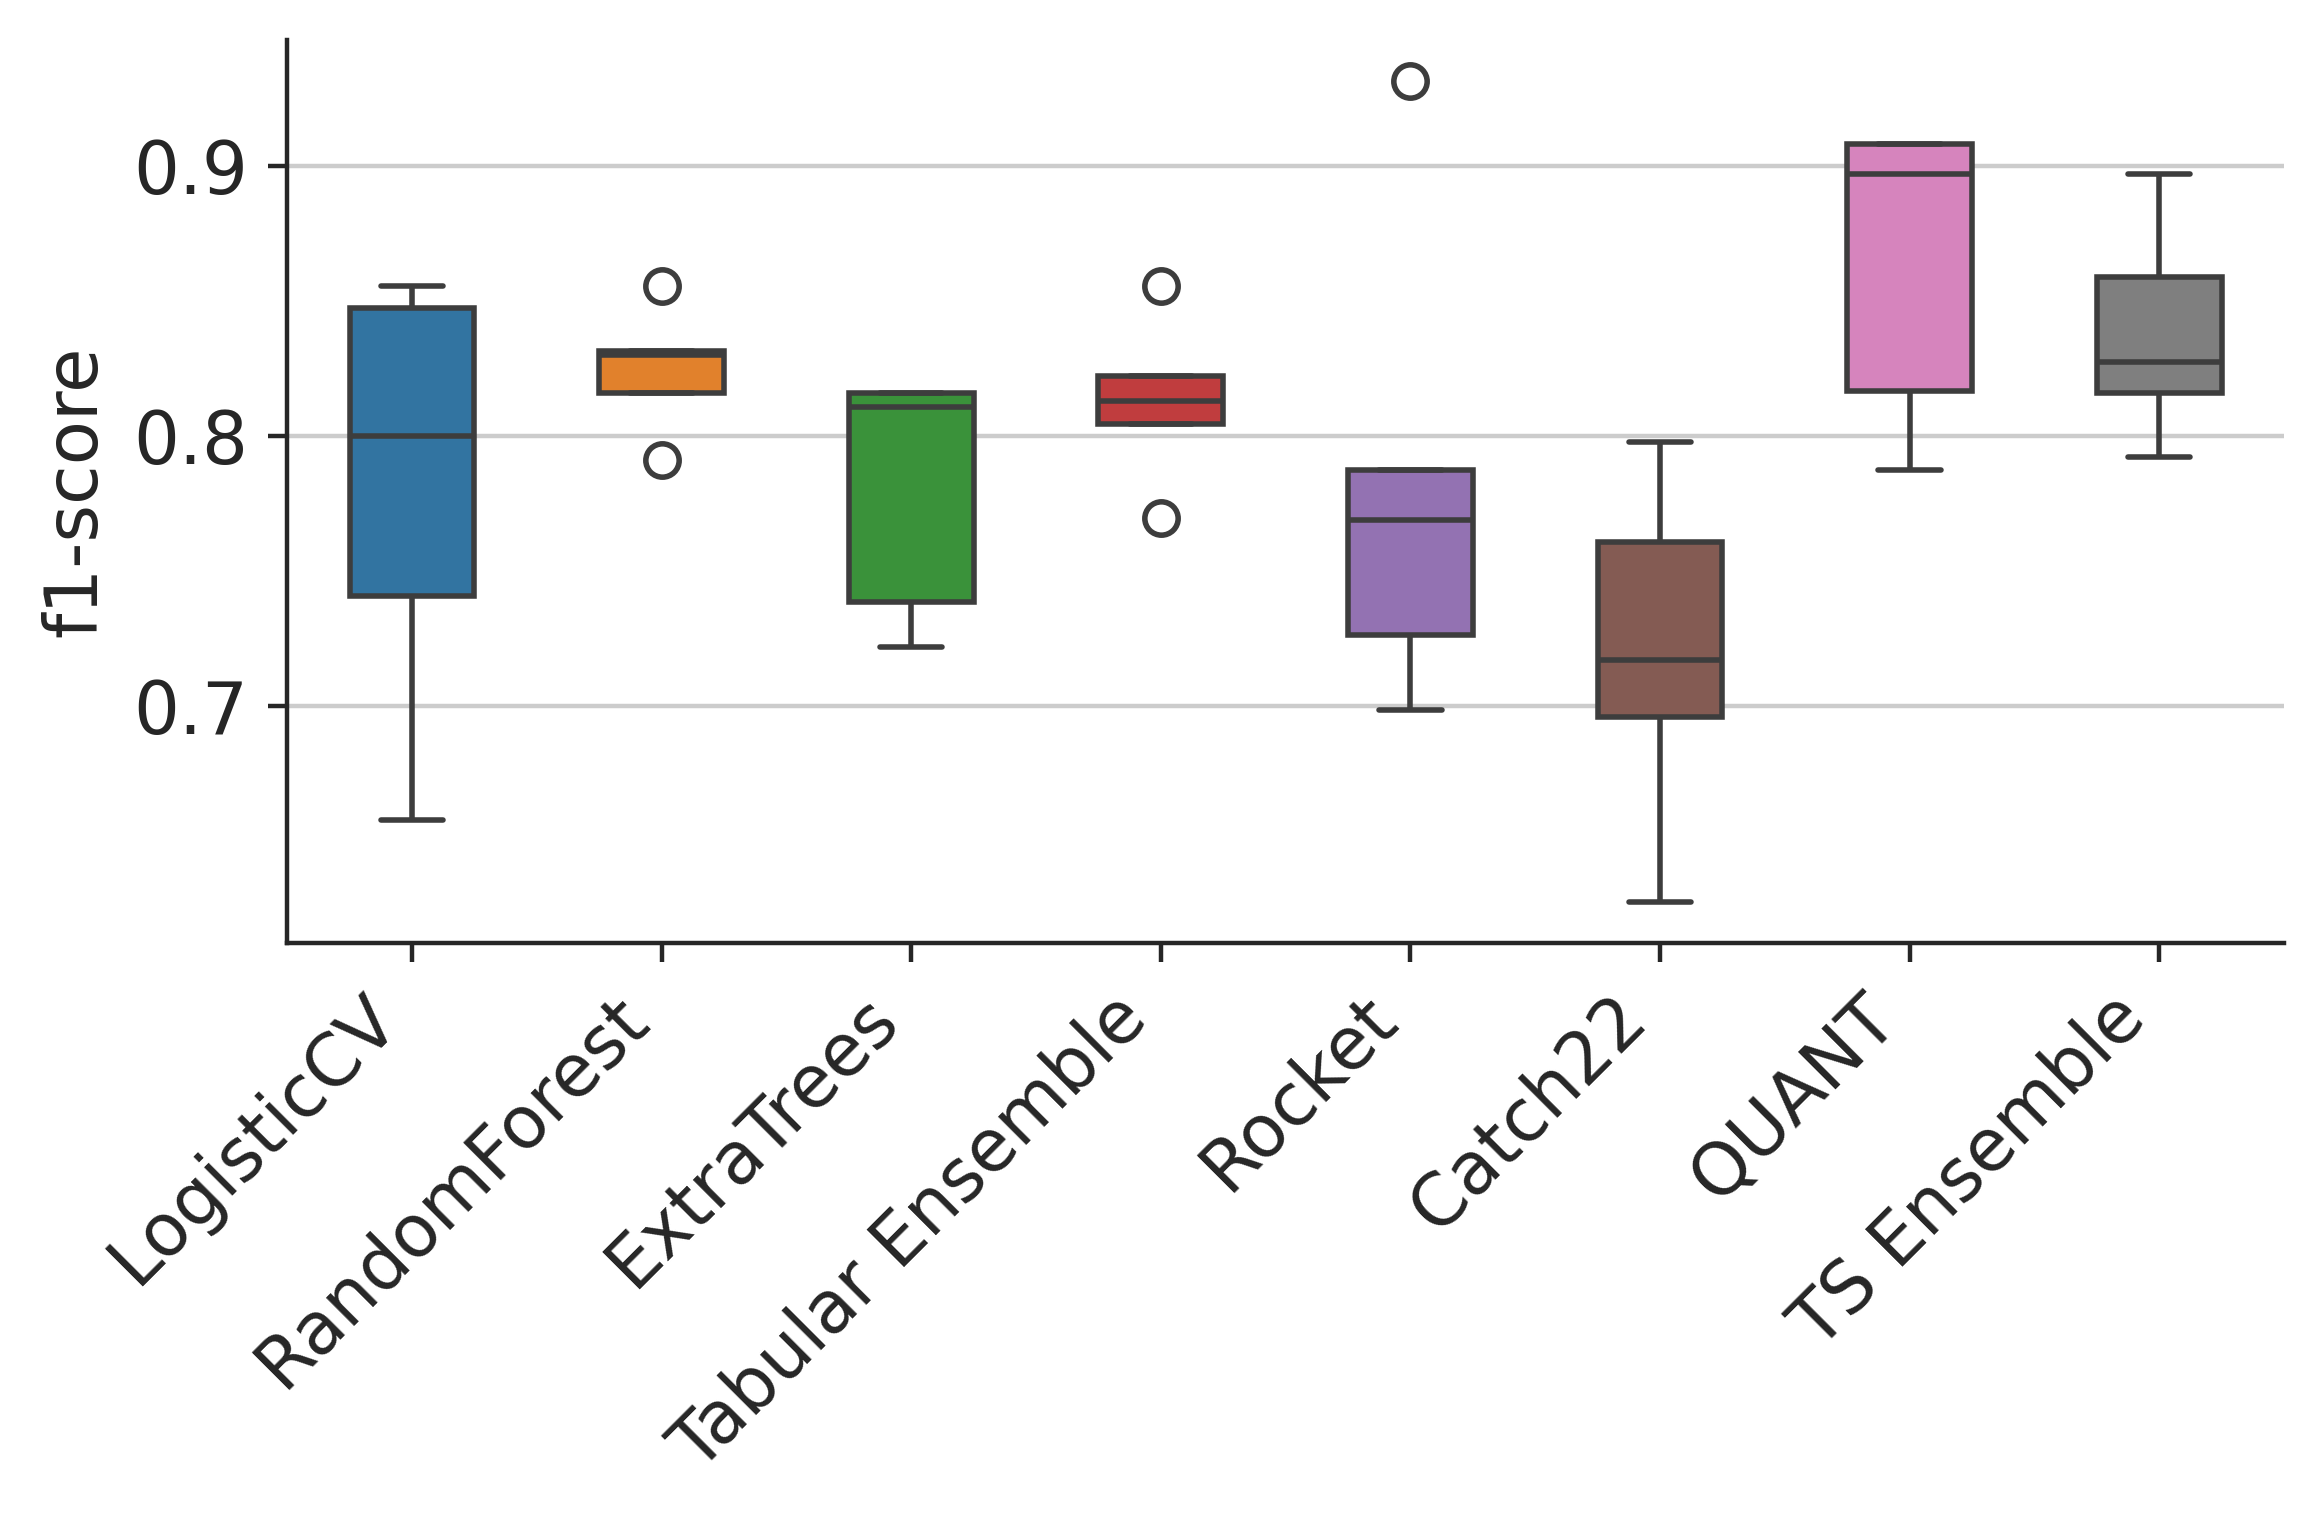

In [24]:
utils.summary_visualization([all_metric_df], name='all_models')

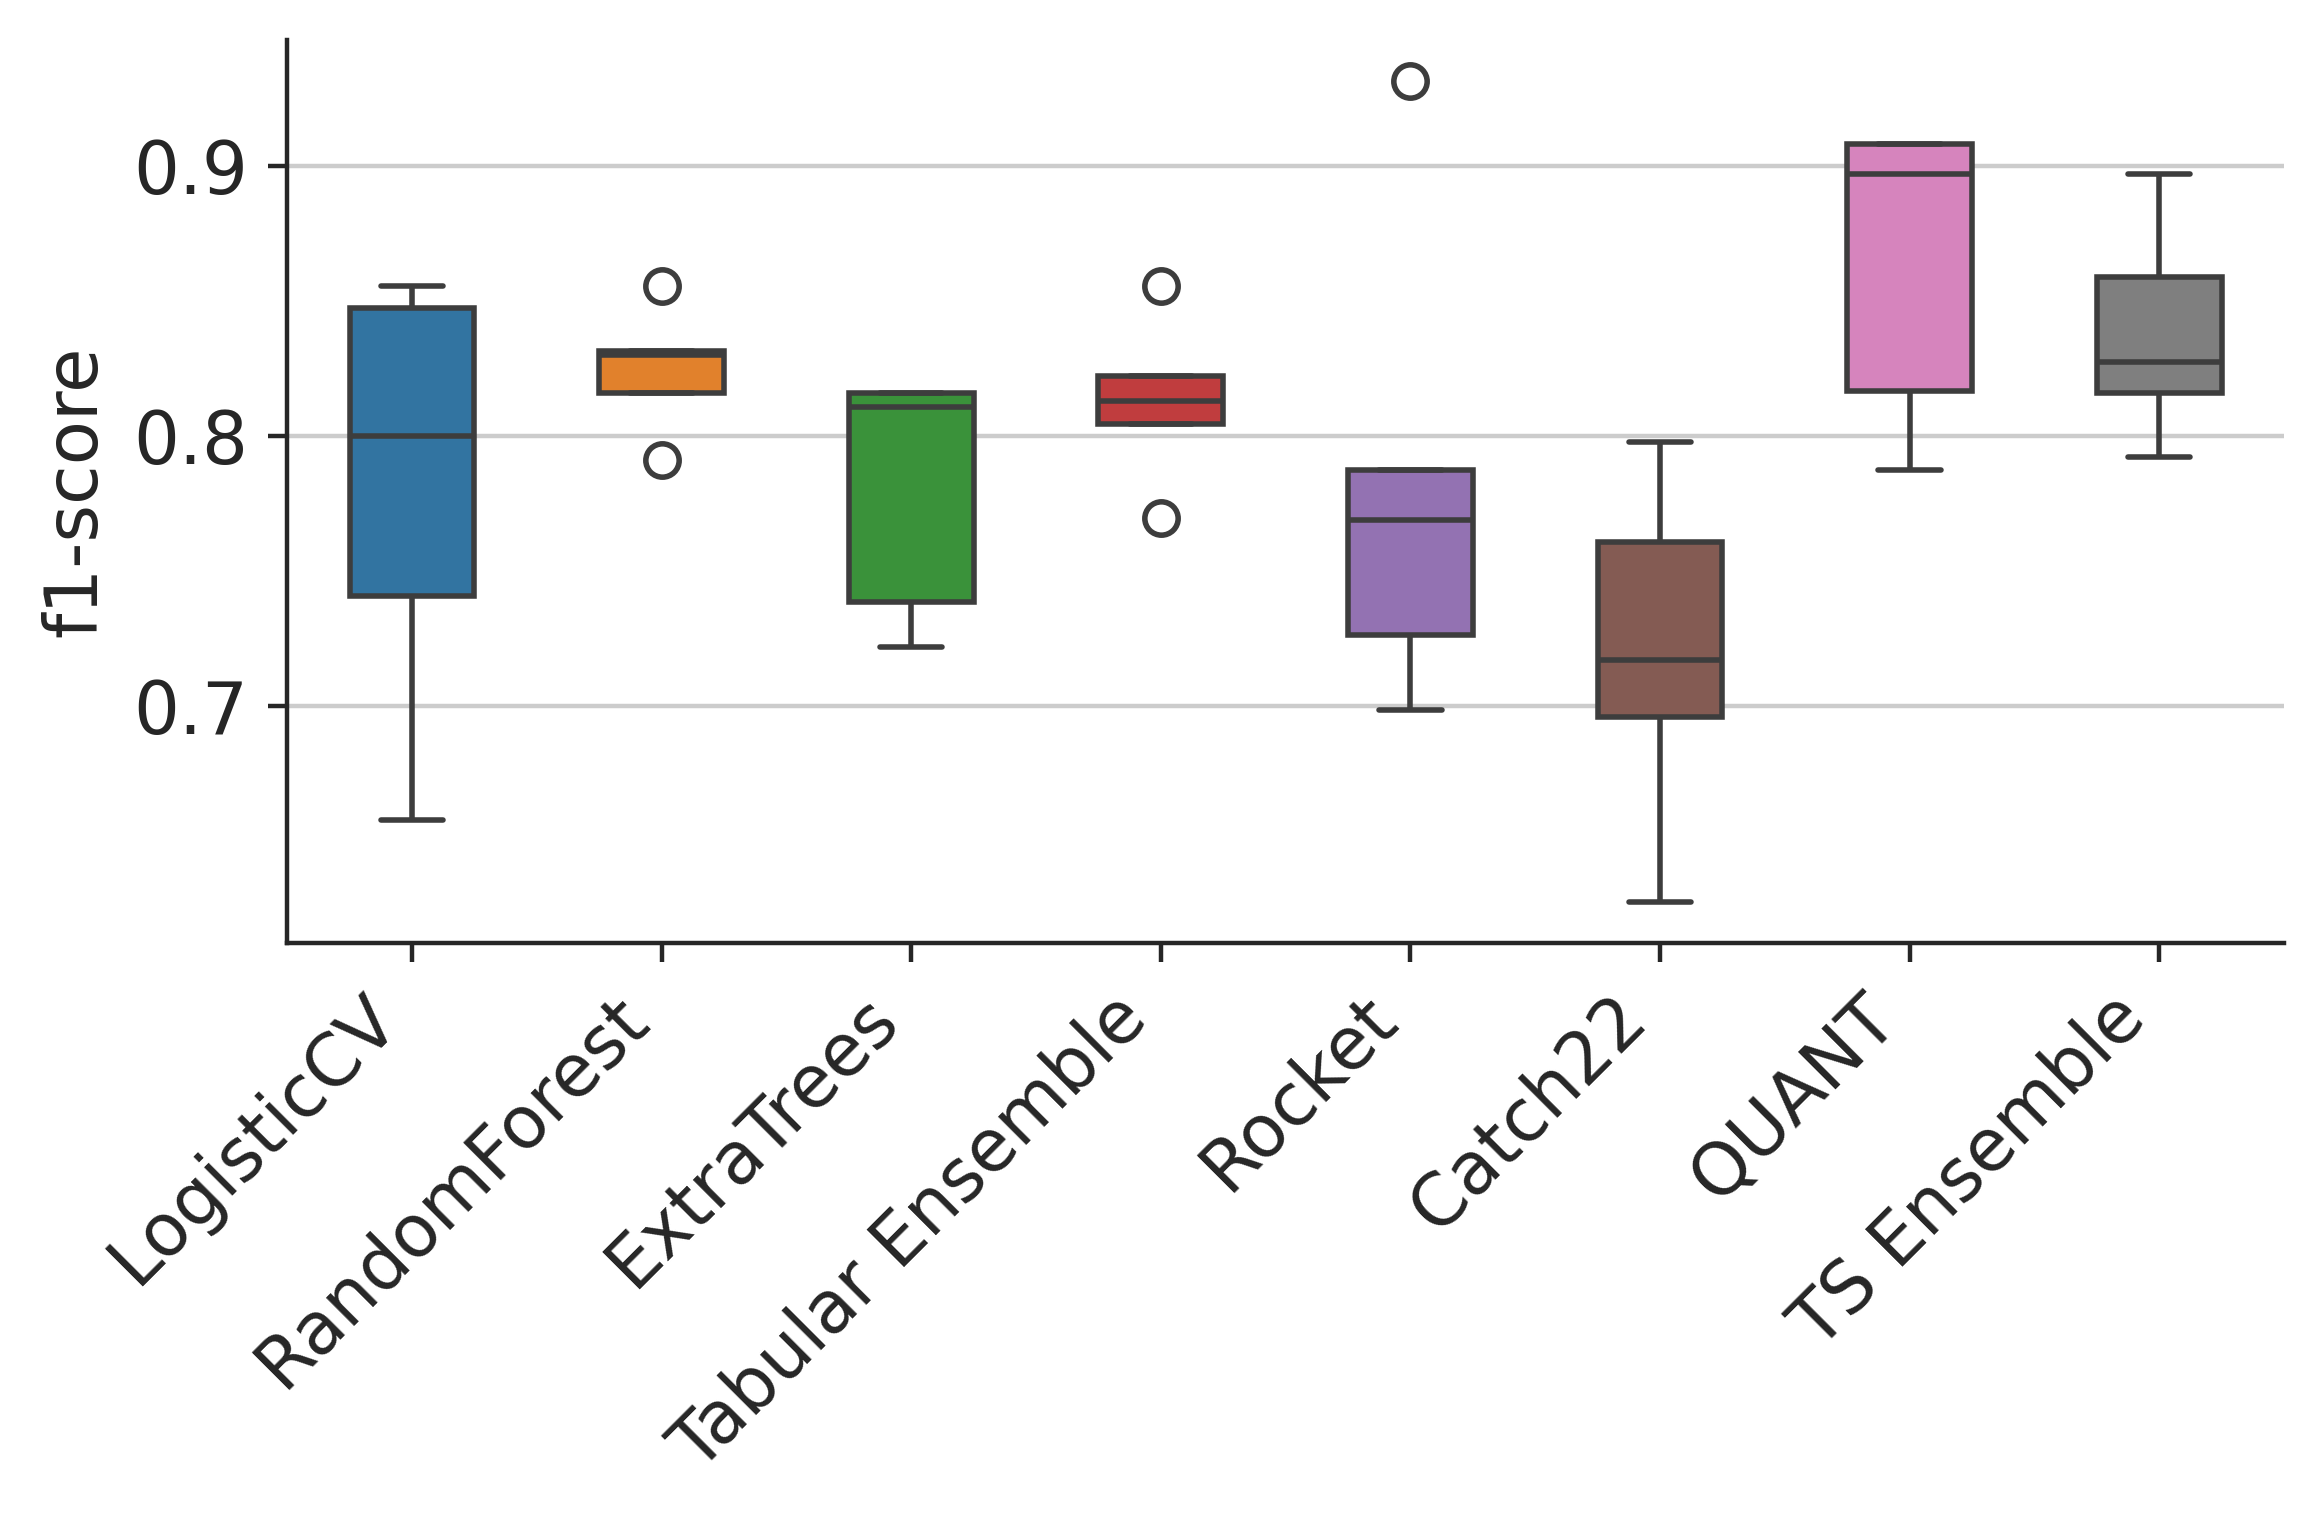

In [9]:
utils.summary_visualization([all_metric_df], name='all_models')

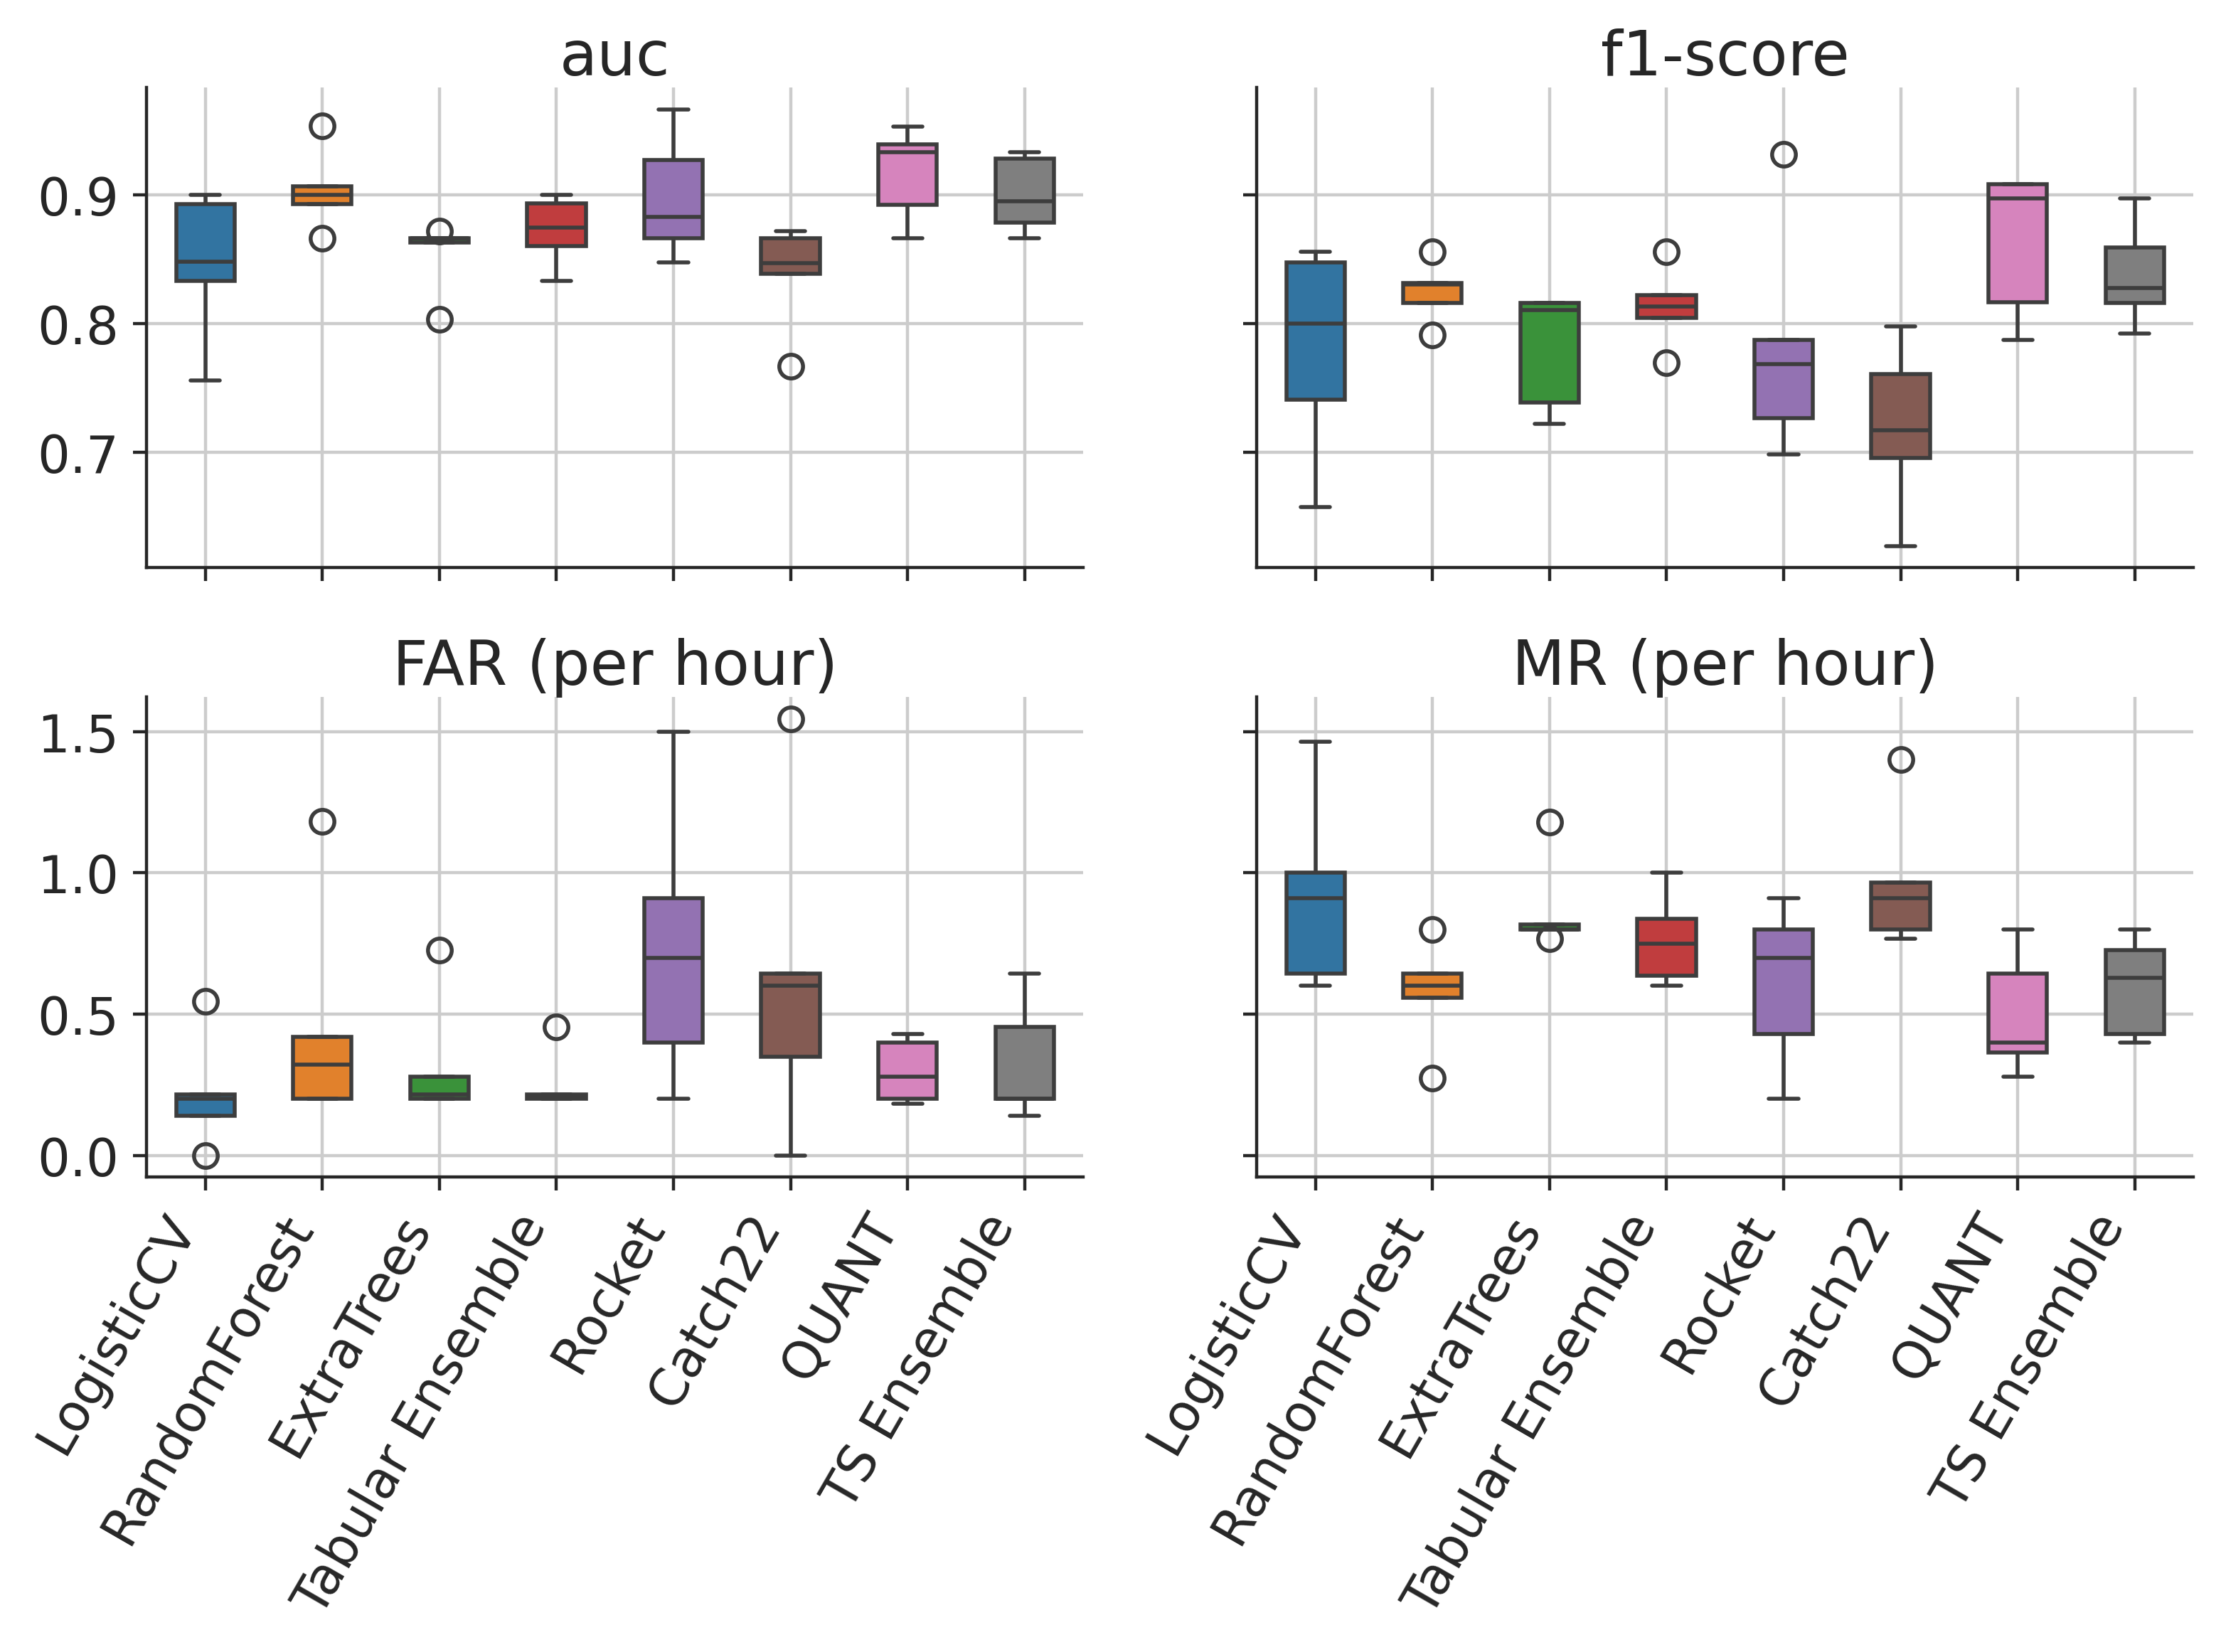

In [109]:
metrics = ['auc', 'f1-score',
           'false alarm rate', 'miss rate']
utils.visualise_all_metrics(all_metric_df, metrics=metrics)

#### Cost-sensitive

In [ ]:
kwargs = dict(
	window_size=7,
    multiphase=True,
	segment_test=False,
	tune_threshold=True)
dataset = utils.train_test_subjects_split(
    farseeing, **kwargs)

Train set: X: (3426, 700), y: (3426,)        ([ADLs, Falls]) [3314  112]
Test set: X: 34, y: 34


In [90]:
metrics_df = []
for t in [False, True]:
    kwargs['tune_threshold'] = t
    kwargs['models_subset'] = ['ExtraTrees']
    kwargs['plot'] = False
    df = classifiers.run_models(*dataset, **kwargs)
    df['threshold'] = 'auto' if t else 'default'
    metrics_df.append(df)
xtrees_df = pd.concat(metrics_df, ignore_index=True)
# metrics_df.to_csv('results/farseeing_tune_threshold_7sec.csv', index=False)

⏳ TRAINING ExtraTrees. ✅
🔍 TESTING ExtraTrees[[3.9598e+06 2.0000e+00]
 [4.0000e+00 2.9000e+01]]
. Ensemble. ✅
⏳ TRAINING ExtraTrees. Tuning threshold...
thresh: 0.4545454545454546 ✅
🔍 TESTING ExtraTrees[[3.9598e+06 2.0000e+00]
 [3.0000e+00 3.0000e+01]]
. Ensemble. ✅


In [91]:
xtrees_df

,model,window_size,runtime,auc,precision,recall,specificity,f1-score,false alarm rate,miss rate,g,threshold
0,ExtraTrees,7,0.471107,0.939394,0.94,0.878788,0.999999,0.908364,0.181817,0.363633,0.001,default
1,Ensemble,7,0.471107,0.939394,0.94,0.878788,0.999999,0.908364,0.181817,0.363633,0.001,default
2,ExtraTrees,7,0.486950,0.954545,0.94,0.909091,0.999999,0.924287,0.181817,0.272725,0.001,auto
3,Ensemble,7,0.486950,0.939394,0.94,0.878788,0.999999,0.908364,0.181817,0.363633,0.001,auto


In [94]:
metrics_df = []
kwargs['ensemble'] = False
kwargs['models_subset'] = None
for t in [False, True]:
    kwargs['tune_threshold'] = t
    for model_type in ['tabular', 'ts']:
        kwargs['model_type'] = model_type
        df = classifiers.run_models(*dataset, **kwargs)
        df['threshold'] = 'auto' if t else 'default'
        df['model_type'] = model_type
        metrics_df.append(df)
metrics_df = pd.concat(metrics_df, ignore_index=True)
metrics_df.to_csv('results/farseeing_tune_threshold_7sec.csv', index=False)

⏳ TRAINING LogisticCV. RandomForest. ExtraTrees. ✅
🔍 TESTING LogisticCV. RandomForest. ExtraTrees. . ✅
⏳ TRAINING Rocket. Catch22. QUANT. ✅
🔍 TESTING Rocket. Catch22. QUANT. . ✅
⏳ TRAINING LogisticCV. Tuning threshold...
thresh: 0.23232391950197182 RandomForest. Tuning threshold...
thresh: 0.36336700336700334 ExtraTrees. Tuning threshold...
thresh: 0.4545454545454546 ✅
🔍 TESTING LogisticCV. RandomForest. ExtraTrees. . ✅
⏳ TRAINING Rocket. Tuning threshold...
thresh: 0.010101010101010102 Catch22. Tuning threshold...
thresh: 0.2939393939393939 QUANT. Tuning threshold...
thresh: 0.3535353535353536 ✅
🔍 TESTING Rocket. Catch22. QUANT. . ✅


In [95]:
metrics_df.sort_values(by=['model'])

,model,window_size,runtime,auc,precision,recall,specificity,f1-score,false alarm rate,miss rate,g,threshold,model_type
4,Catch22,7,21.464582,0.863636,0.89,0.727273,0.999999,0.800450,0.272725,0.818175,0.001,default,ts
10,Catch22,7,16.672135,0.939392,0.67,0.878788,0.999996,0.760321,1.272717,0.363633,0.001,auto,ts
2,ExtraTrees,7,0.479098,0.939394,0.94,0.878788,0.999999,0.908364,0.181817,0.363633,0.001,default,tabular
8,ExtraTrees,7,0.564419,0.954545,0.94,0.909091,0.999999,0.924287,0.181817,0.272725,0.001,auto,tabular
0,LogisticCV,7,0.122435,0.878787,0.83,0.757576,0.999999,0.792136,0.454542,0.727267,0.001,default,tabular
6,LogisticCV,7,0.128656,0.954544,0.77,0.909091,0.999998,0.833785,0.818175,0.272725,0.001,auto,tabular
5,QUANT,7,4.122839,0.954545,0.88,0.909091,0.999999,0.894309,0.363633,0.272725,0.001,default,ts
11,QUANT,7,4.242506,0.984848,0.84,0.969697,0.999998,0.900201,0.545450,0.090908,0.001,auto,ts
1,RandomForest,7,0.172765,0.954544,0.79,0.909091,0.999998,0.845372,0.727267,0.272725,0.001,default,tabular
7,RandomForest,7,0.169083,0.969696,0.76,0.939394,0.999997,0.840228,0.909083,0.181817,0.001,auto,tabular


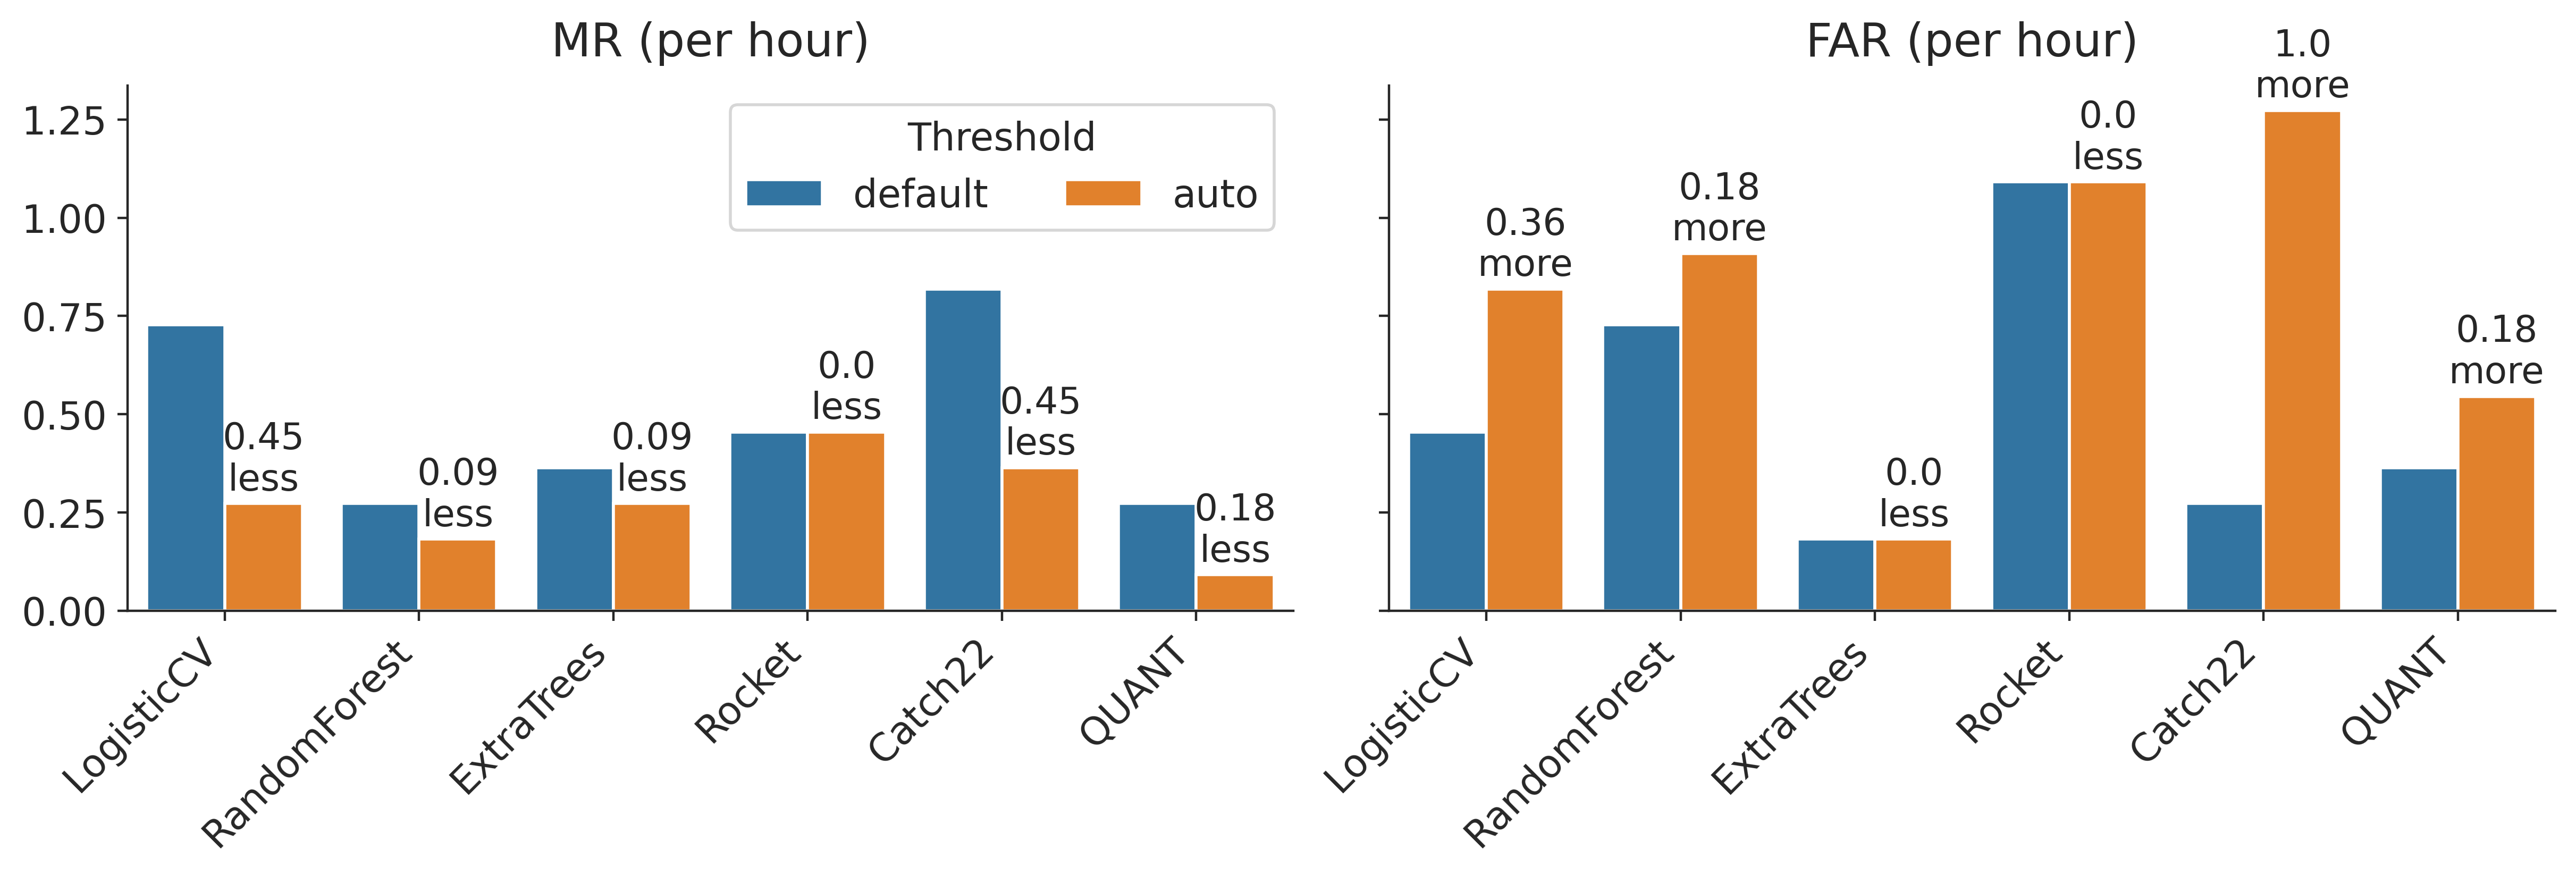

In [158]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4), dpi=400,
					   sharey=True, layout='constrained')
for i, m in enumerate(['miss rate', 'false alarm rate']):
	sns.barplot(data=metrics_df, x='model', y=m, hue='threshold',
			 ax=ax[i], palette='tab10')
	labels1 = [x for x in ax[i].containers[0].datavalues] # Round up container[0] values
	labels2 = [x for x in ax[i].containers[1].datavalues] # Round up container[1] values
	improvements = [np.round(b-a,2) for a, b in zip(labels1, labels2)] # Calculate improvements
	lbls = [f'{i}\nmore' if i > 0 else f'{abs(i)}\nless' for i in improvements] # Annotate using rounded values
	# Annotate using rounded values
	ax[i].bar_label(ax[i].containers[1], labels=lbls, fontsize=12.5, padding=2)
	ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45, ha='right')
	m = 'FAR (per hour)' if m == 'false alarm rate' else m
	m = 'MR (per hour)' if m == 'miss rate' else m
	ax[i].set_title(m, pad=10)
	ax[i].set_xlabel('')
	ax[i].set_ylabel('')
	# only show legend for the last plot
	if i > 0:
		ax[i].get_legend().remove()
	else:
		ax[i].legend(title='Threshold', ncols=2)
sns.despine()
plt.savefig('figs/barplot_tune_threshold_7sec.pdf',
			dpi=400, bbox_inches='tight')
plt.show()

#### Cost sensitivity analysis

In [187]:
# Run through a range of FN factors and see the effect on the metrics
tune_df = []
kwargs['ensemble'] = False
kwargs['models_subset'] = None
kwargs['tune_threshold'] = True
for fn_factor in np.arange(2, 20, 2):
	kwargs['fn_factor'] = fn_factor
	df = classifiers.run_models(*dataset, **kwargs)
	df['fn_factor'] = fn_factor
	tune_df.append(df)
tune_df = pd.concat(tune_df, ignore_index=True)
tune_df.to_csv('results/sensitivity_analysis.csv', index=False)

⏳ TRAINING Rocket. Tuning threshold...
thresh: 0.010101010101010102 Catch22. Tuning threshold...
thresh: 0.35272727272727267 QUANT. Tuning threshold...
thresh: 0.3535353535353536 ✅
🔍 TESTING Rocket. Catch22. QUANT. . ✅
⏳ TRAINING Rocket. Tuning threshold...
thresh: 0.010101010101010102 Catch22. Tuning threshold...
thresh: 0.2939393939393939 QUANT. Tuning threshold...
thresh: 0.3535353535353536 ✅
🔍 TESTING Rocket. Catch22. QUANT. . ✅
⏳ TRAINING Rocket. Tuning threshold...
thresh: 0.010101010101010102 Catch22. Tuning threshold...
thresh: 0.2939393939393939 QUANT. Tuning threshold...
thresh: 0.3535353535353536 ✅
🔍 TESTING Rocket. Catch22. QUANT. . ✅
⏳ TRAINING Rocket. Tuning threshold...
thresh: 0.010101010101010102 Catch22. Tuning threshold...
thresh: 0.2939393939393939 QUANT. Tuning threshold...
thresh: 0.3535353535353536 ✅
🔍 TESTING Rocket. Catch22. QUANT. . ✅
⏳ TRAINING Rocket. Tuning threshold...
thresh: 0.010101010101010102 Catch22. Tuning threshold...
thresh: 0.2939393939393939 QUA

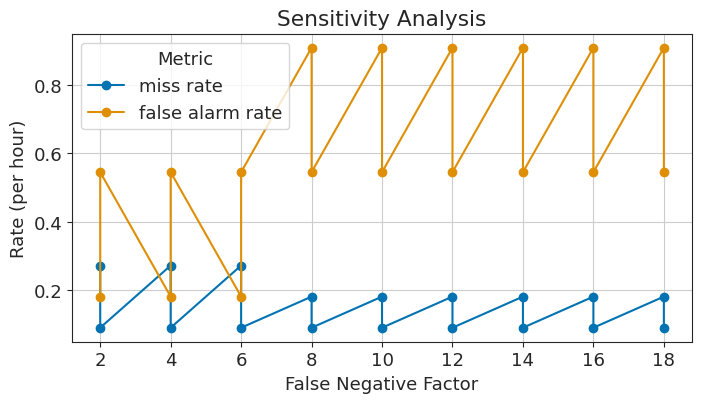

In [182]:
quant_metrics_df.plot(x='fn_factor', y=['miss rate', 'false alarm rate'],
					  kind='line', marker='o', figsize=(8, 4), grid=True)
plt.xlabel('False Negative Factor')
plt.ylabel('Rate (per hour)')
plt.title('Sensitivity Analysis')
plt.legend(title='Metric')
# plt.savefig('figs/sensitivity_analysis.pdf', dpi=400, bbox_inches='tight')
plt.show()

In [184]:
quant_metrics_df

,model,window_size,runtime,auc,precision,recall,specificity,f1-score,false alarm rate,miss rate,g,fn_factor
0,ExtraTrees,7,0.464314,0.954545,0.94,0.909091,0.999999,0.924287,0.181817,0.272725,0.001,2
1,QUANT,7,4.231537,0.984848,0.84,0.969697,0.999998,0.900201,0.545450,0.090908,0.001,2
2,ExtraTrees,7,0.461912,0.954545,0.94,0.909091,0.999999,0.924287,0.181817,0.272725,0.001,4
3,QUANT,7,4.247642,0.984848,0.84,0.969697,0.999998,0.900201,0.545450,0.090908,0.001,4
4,ExtraTrees,7,0.482233,0.954545,0.94,0.909091,0.999999,0.924287,0.181817,0.272725,0.001,6
5,QUANT,7,4.256110,0.984848,0.84,0.969697,0.999998,0.900201,0.545450,0.090908,0.001,6
6,ExtraTrees,7,0.462802,0.969696,0.76,0.939394,0.999997,0.840228,0.909083,0.181817,0.001,8
7,QUANT,7,4.250642,0.984848,0.84,0.969697,0.999998,0.900201,0.545450,0.090908,0.001,8
8,ExtraTrees,7,0.478242,0.969696,0.76,0.939394,0.999997,0.840228,0.909083,0.181817,0.001,10
9,QUANT,7,4.221790,0.984848,0.84,0.969697,0.999998,0.900201,0.545450,0.090908,0.001,10


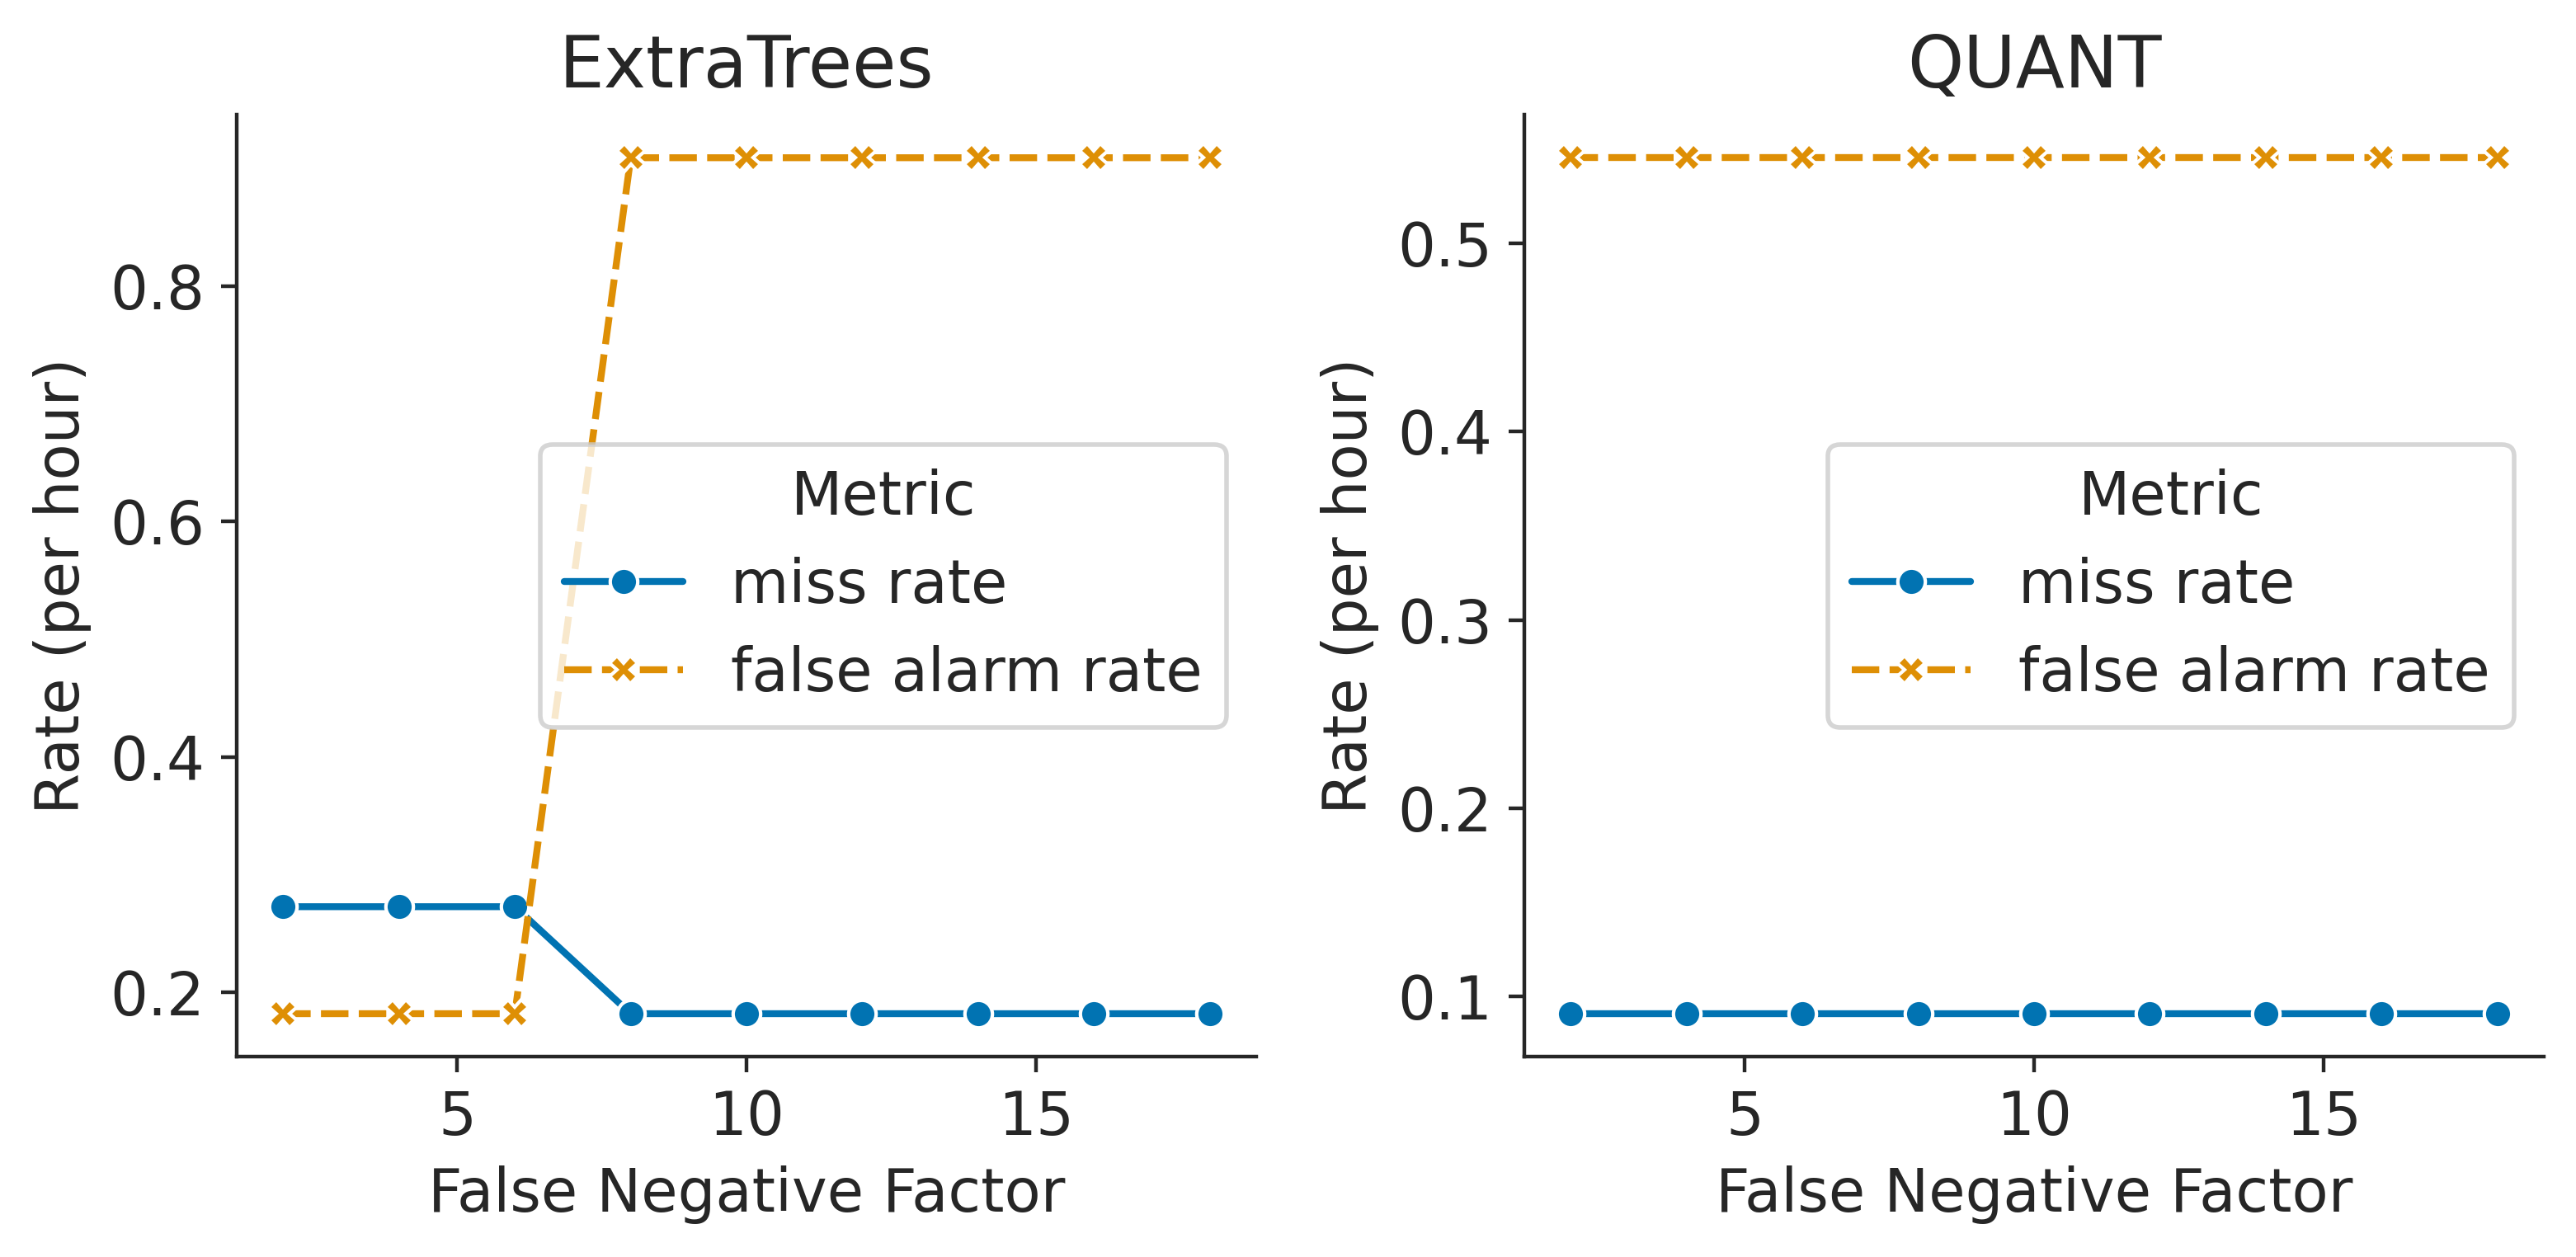

In [183]:
long_sens_df = quant_metrics_df.melt(id_vars=['model', 'fn_factor'],
									  value_vars=['miss rate', 'false alarm rate'],
									  var_name='metric', value_name='rate')
fig, ax = plt.subplots(1, 2, figsize=(8, 4), dpi=400)
for i, model in enumerate(long_sens_df['model'].unique()):
	sns.lineplot(data=long_sens_df[long_sens_df['model'] == model],
				 x='fn_factor', y='rate', hue='metric', style='metric',
				 markers=True, ax=ax[i])
	ax[i].set_title(model)
	ax[i].set_xlabel('False Negative Factor')
	ax[i].set_ylabel('Rate (per hour)')
	ax[i].legend(title='Metric')
sns.despine()
plt.tight_layout()
# plt.savefig('figs/sensitivity_analysis_long.pdf', dpi=400, bbox_inches='tight')
plt.show()